# Introduction
There is no better way to explore and gain familiarity with the dataset than to take a closer look at it and analyse main characteristics through the lens or steps of EDA together with modeling.

The objectives of this Preparation notebook are as follows:

    * Clean, tide and prepare the dataset for fruitful analysis;
    * Gain understanding of the data and possibly find clues;
    * Formulate hypothesis for modelling;
    * Check for rarities that may impact the forecasting model;
    * Combine all four datasets into one dataset; 
    * Split the combined dataset into training and test subsets;
    * Train the model based on the training and test subsets;
    * Evaluate the model;

## Libraries
The foundation of a data analysis and preparation notebook are a few indispensable libraries used to work with and plot the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Datasets overview
Set up the initial dataframes supplied and glance at these to develop a basic idea of the subject. Generate a simple preview to get an impression of the datasets.

### Dataset resource: V.A. Medical Center, Long Beach, CA

In [2]:
df_va = pd.read_csv('processed.va.csv', delimiter=';')
df_va

,age,sex,cp,trestbps,chol,fbs,restecg,thalac,exang,oldpeak,slope,ca,thal,num
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127,333,1,1,154,0,0,?,?,?,1
196,62,1,1,?,139,0,1,?,?,?,?,?,?,0
197,55,1,4,122,223,1,1,100,0,0,?,?,6,2
198,58,1,4,?,385,1,2,?,?,?,?,?,?,0


### Dataset resource: Hungarian Institute of Cardiology, Budapest

In [3]:
df_hungary = pd.read_csv('reprocessed.hungarian.csv', delimiter=';')
df_hungary

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,40,1,2,140,289,0,0,172,0,0.0,-9,-9,-9,0
1,49,0,3,160,180,0,0,156,0,1.0,2,-9,-9,1
2,37,1,2,130,283,0,1,98,0,0.0,-9,-9,-9,0
3,48,0,4,138,214,0,0,108,1,1.5,2,-9,-9,3
4,54,1,3,150,-9,0,0,122,0,0.0,-9,-9,-9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,48,0,2,-9,308,0,1,-9,-9,2.0,1,-9,-9,0
290,36,1,2,120,166,0,0,180,0,0.0,-9,-9,-9,0
291,48,1,3,110,211,0,0,138,0,0.0,-9,-9,6,0
292,47,0,2,140,257,0,0,135,0,1.0,1,-9,-9,0


### Dataset resource: University Hospital, Zurich, Switzerland

In [4]:
df_switzerland = pd.read_csv('processed.switzerland.csv', delimiter=';')
df_switzerland

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,32,1,1,95,0,?,0,127,0,.7,1,?,?,1
1,34,1,4,115,0,?,?,154,0,.2,1,?,?,1
2,35,1,4,?,0,?,0,130,1,?,?,?,7,3
3,36,1,4,110,0,?,0,125,1,1,2,?,6,1
4,38,0,4,105,0,?,0,166,0,2.8,1,?,?,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,70,1,4,115,0,0,1,92,1,0,2,?,7,1
119,70,1,4,140,0,1,0,157,1,2,2,?,7,3
120,72,1,3,160,0,?,2,114,0,1.6,2,2,?,0
121,73,0,3,160,0,0,1,121,0,0,1,?,3,1


### Dataset resource: Cleveland Clinic Foundation

In [5]:
df_cleveland = pd.read_csv('processed.cleveland.csv', delimiter=';')
df_cleveland

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


All datasets contain the same information in terms of attributes but vary in values. Total of 14 numeric-valued columns are available and identical per each data set, however the records provided are not the same amount. In addition, there are many '?' / '-9' values among columns in the 4 tables. Focus on cleaning and tidying the datasets separately.

## Target feature
Predict the presence of the heart disease of the patient. It is an integer value ranging from 0 to 4 and is represented by the last column. 

## Data insight
All four databases concern heart disease diagnosis. Explanation on what each column represents, the meaning of values contained and what data type should these have is provided as follows:
* *AGE* - Integer value
<br> Patient's age in years
* *SEX* - Categorical data
<br> Patient's sex, where 1 stands for male and 0 - for female.
* *CP / CHESTPAIN* - Categorical data
<br> Type or classification of chest pain. Possible values are:
    * 1 = typical angina, which implies a definite angina and a definite heart disease;
    * 2 = atypical angina, which implies a probable angina and a probable heart disease. It includes most features of definite angina, but may not be entirely typical in some aspects;
    * 3 = non-anginal pain, which implies "probably not angina" and "probably not heart disease". It does not fit the description of definite angina;
    * 4 = asymptomatic, which implies "definitely not angina' and "definitely not heart disease". It appears to be clearly of non-cardiac origin.
* *TRESTBPS / RESTBLOODPRESSURE* - Integer value
<br> Resting or normal blood pressure, measured in mm Hg on admission of the patient to the hospital. Normal blood pressure is considered to be between 80 to 120 measurements.
* *CHOL / CHOLESTEROL* - Integer value
<br> Serum cholesterol in mg/dl. Cholesterol is often associated with heart disease. Healthy serum cholesterol is considered to be less than 200 mg/dL.
* *FBS / HIGHBLOODSUGAR* - Categorical data
<br> Fasting blood sugar indicates presence of diabetes. The possible values are 1 for has diabetes and 0 for does not have diabetes. 
* *RESTECG / ELECTROCARDIOGRAPHY* - Categorical data
<br> Resting electrocardiographic results of patient. Possible values are:
    * 0 = normal;
    * 1 = ST-T wave abnormality;
    * 2 = hypertrophy.
* *THALACH / MAXHEARTRATE* - Integer value
<br> Maximum heart rate achieved. 
* *EXANG / SPORTANGINA* - Categorical data
<br> Exercise induced angina, where 1 stands for yes and 0 - for no.
* *OLDPEAK / STDEPRESSION* - Floating number
<br> ST depression induced by exercise relative to rest.
* *SLOPE / STSEGMENTSLOPE* - Categorical data
<br> The slope of the peak exercise ST segment. Possible values are:
    * 1 = upsloping, which is considered normal during physical exercise;
    * 2 = flat;
    * 3 = downsloping.
* *CA / MAJORVESSELSNUM* - Integer value
<br> Number of major vessels.
* *THAL / THALSTATUS* - Categorical data
<br> Thalassemia blood disorder. Possible values are:
    * 3 = normal;
    * 6 = fixed defect;
    * 7 = reversable defect;
* *NUM / DIAGNOSIS* - Categorical data
<br> Diagnosis of heart disease (angiographic disease status). The higher the number, the more severe the diagnosis is, which means the more diameter narrowing there is in major vessels. Possible values are
    * 0 = absence of heart disease
    * 1 - 4 = present.

## Datasets cleaning and tidying

All four datasets provided need common refinement in regards with
* **RECORD ID**
<br> Records number starts from 0. This is not conventional as it appears as if the first row does not count towards the values below, which is not the case here. Change the numbering of records to start from 1.
* **ATTRIBUTE NAMING**
<br> Comprehensible naming of columns is of key importance for clear understanding of the meaning of values placed under each attribute. The column names of the datasets are not all transparent in the meaning of information contained. Change these with a more precise name. The previous section "Data insight" is used as a basis.
* **NOT PROVIDED VALUES**
<br> Values that are not provided, commonly known as 'NA'/'NaN', may contain unwonted symbols (e.g. '?'), numbers (e.g. '-9') and characters, blank space or other rarities of this kind. It is a good practice to use an identical transparent indication for representing such values, for example 'NA'/'NaN'. This way it would be clearer where and how much 'NaN' values each column has as the statistics generated for the tables will already recognise such information. Handling missing data is important for fruitful analysis and predictions. Replacing 'NaN' values with other suitable values extracted from the current dataset is what should be done in the case of not being able to collect the truthful data from the resource. Sticking to the relevance of already provided data is a key factor when filling in unavailable data. Column 'diagnosis' is the key indicator for degree of heart disease for each patient. Therefore, the way chosen to proceed in this case is to separate the dataset per each diagnosis category and manipulate the missing values as follows:
    * NUMERIC DATA - replace the NaN values of each numeric columns with its mean or mode value for each heart disease degree;
    * CATEGORICAL DATA - replace the NaN values of each categorical column with its most frequent value for each heart disease degree.
<br>Which attributes are numeric and which are categorical can be found in previous section "Data Insight". In addition, some data types of the columns should be changed to numeric in order to enable calculation of mean value.
* **DATA TYPES**
<br> Setting relevant data types to the presented values in each column is a fundamental step towards fruitful analysis. Adjust the data type in regards with the presented values (numerical/categorical type). 

### V.A. dataset

In [6]:
df_va.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalac,exang,oldpeak,slope,ca,thal,num
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
5,66,1,3,120,0,0,1,120,0,-0.5,1,?,?,0
6,65,1,4,150,236,1,1,105,1,0,?,?,?,3
7,60,1,3,180,0,0,1,140,1,1.5,2,?,?,0
8,60,1,3,120,0,?,0,141,1,2,1,?,?,3
9,60,1,2,160,267,1,1,157,0,0.5,2,?,?,1


#### RECORD ID

In [7]:
df_va.index = df_va.index + 1

#### ATTRIBUTE NAMING

In [8]:
df_va = df_va.rename(columns={'cp': 'chestPain', 'trestbps': 'restBloodPressure', 'chol': 'cholesterol',
                                            'fbs': 'highBloodSugar', 'restecg': 'electrocardiography', 'thalac': 'maxHeartRate',
                                            'exang': 'sportAngina', 'oldpeak': 'STdepression', 'slope': 'STsegmentSlope', 
                                            'ca': 'majorVesselsNum', 'thal': 'thalStatus', 'num': 'diagnosis'})
df_va

,age,sex,chestPain,restBloodPressure,cholesterol,highBloodSugar,electrocardiography,maxHeartRate,sportAngina,STdepression,STsegmentSlope,majorVesselsNum,thalStatus,diagnosis
1,63,1,4,140,260,0,1,112,1,3,2,?,?,2
2,44,1,4,130,209,0,1,127,0,0,?,?,?,0
3,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
4,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
5,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,54,0,4,127,333,1,1,154,0,0,?,?,?,1
197,62,1,1,?,139,0,1,?,?,?,?,?,?,0
198,55,1,4,122,223,1,1,100,0,0,?,?,6,2
199,58,1,4,?,385,1,2,?,?,?,?,?,?,0


#### NOT PROVIDED VALUES

Get all records with '?' as value

In [9]:
df_va[df_va.eq('?').any(1)]

,age,sex,chestPain,restBloodPressure,cholesterol,highBloodSugar,electrocardiography,maxHeartRate,sportAngina,STdepression,STsegmentSlope,majorVesselsNum,thalStatus,diagnosis
1,63,1,4,140,260,0,1,112,1,3,2,?,?,2
2,44,1,4,130,209,0,1,127,0,0,?,?,?,0
3,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
4,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
5,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,54,0,4,127,333,1,1,154,0,0,?,?,?,1
197,62,1,1,?,139,0,1,?,?,?,?,?,?,0
198,55,1,4,122,223,1,1,100,0,0,?,?,6,2
199,58,1,4,?,385,1,2,?,?,?,?,?,?,0


The whole dataset is full of these values => replace them with more appropriate naming, like 'NAN'

In [10]:
df_va = df_va.replace('?', np.nan)
df_va

,age,sex,chestPain,restBloodPressure,cholesterol,highBloodSugar,electrocardiography,maxHeartRate,sportAngina,STdepression,STsegmentSlope,majorVesselsNum,thalStatus,diagnosis
1,63,1,4,140,260,0,1,112,1,3,2,NaN,NaN,2
2,44,1,4,130,209,0,1,127,0,0,NaN,NaN,NaN,0
3,60,1,4,132,218,0,1,140,1,1.5,3,NaN,NaN,2
4,55,1,4,142,228,0,1,149,1,2.5,1,NaN,NaN,1
5,66,1,3,110,213,1,2,99,1,1.3,2,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,54,0,4,127,333,1,1,154,0,0,NaN,NaN,NaN,1
197,62,1,1,NaN,139,0,1,NaN,NaN,NaN,NaN,NaN,NaN,0
198,55,1,4,122,223,1,1,100,0,0,NaN,NaN,6,2
199,58,1,4,NaN,385,1,2,NaN,NaN,NaN,NaN,NaN,NaN,0


In [11]:
df_va.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 1 to 200
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  200 non-null    int64 
 1   sex                  200 non-null    int64 
 2   chestPain            200 non-null    int64 
 3   restBloodPressure    144 non-null    object
 4   cholesterol          193 non-null    object
 5   highBloodSugar       193 non-null    object
 6   electrocardiography  200 non-null    int64 
 7   maxHeartRate         147 non-null    object
 8   sportAngina          147 non-null    object
 9   STdepression         144 non-null    object
 10  STsegmentSlope       98 non-null     object
 11  majorVesselsNum      2 non-null      object
 12  thalStatus           34 non-null     object
 13  diagnosis            200 non-null    int64 
dtypes: int64(5), object(9)
memory usage: 22.0+ KB


Columns 'majorVesselsNum' and 'thalStatus' have the majority of the values 'NaN'. Therefore, much information cannot be extracted from these attributes in the current dataset. However, dropping these columns would intervine combining all datasets as the other 3 data resources might contain meaningful data for these columns. Leave both columns with the 'NaN' values for now and do not count on them when manipulating the VA dataset.

Before filling in the missing data, change data types of all columns with null values to 'float64', because it allows for NaN values unlike type 'int32'.

In [12]:
df_va = df_va.astype({'restBloodPressure':'float64', 'cholesterol': 'float64', 'highBloodSugar': 'float64', 
                      'maxHeartRate': 'float64', 'sportAngina': 'float64', 'STdepression': 'float64', 
                      'STsegmentSlope': 'float64'})

##### RESTBLOODPRESSURE: integer | Mean 

Text(0.5, 1.0, 'Distribution of resting blood pressure')

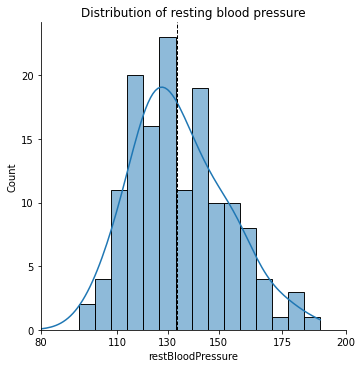

In [13]:
ax = sns.displot(data=df_va, x="restBloodPressure", kde=True, bins=30)
plt.xlim((80,df_va['restBloodPressure'].max()))
plt.xticks([80, 110, 130, 150, 175, 200])
plt.axvline(df_va['restBloodPressure'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.title('Distribution of resting blood pressure')

The black dashed line represents the median value ~ 132.

This histogram appears as a normal one, so replacing missing values with mean value is a suitable option. Group the data in 'restBloodPressure' by 'diagnosis' and replace the missing values with the mean value for each diagnosis category.

In [14]:
s = df_va.groupby('diagnosis').apply(lambda x: round(x['restBloodPressure'].mean()))
s

diagnosis
0    130
1    131
2    136
3    134
4    152
dtype: int64

Find an example NaN(s), replace all with mean value and check whether the new value is as expected based on the diagnosis category. In this case, the replacement is successful.

In [15]:
df_va[['diagnosis','restBloodPressure']].query('restBloodPressure == "NaN"').head(5)

,diagnosis,restBloodPressure
14,1,NaN
24,0,NaN
27,2,NaN
30,3,NaN
31,3,NaN


In [16]:
df_va['restBloodPressure'].fillna(df_va['diagnosis'].map(s), inplace=True)
df_va.loc[14]

age                     63
sex                      1
chestPain                3
restBloodPressure      131
cholesterol              0
highBloodSugar           0
electrocardiography      2
maxHeartRate           NaN
sportAngina            NaN
STdepression           NaN
STsegmentSlope         NaN
majorVesselsNum        NaN
thalStatus             NaN
diagnosis                1
Name: 14, dtype: object

##### CHOLESTEROL: integer | Mean 

Text(0.5, 1.0, 'Distribution of cholesterol levels')

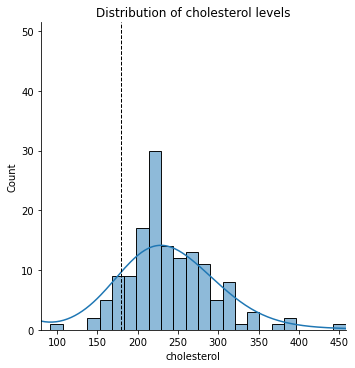

In [17]:
ax = sns.displot(data=df_va, x="cholesterol", kde=True, bins=30)
plt.xlim((80,df_va['cholesterol'].max()))
plt.axvline(df_va['cholesterol'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.title('Distribution of cholesterol levels')

The black dashed line represents the median value ~ 175.

This histogram appears as a normal one, so replacing missing values with mean value is a suitable option. Group the data in 'cholesterol' by 'diagnosis' and replace the missing values with the mean value for each diagnosis category.

In [18]:
df_va.groupby('diagnosis')['cholesterol'].mean().round(0)

diagnosis
0    175.0
1    176.0
2    155.0
3    203.0
4    210.0
Name: cholesterol, dtype: float64

In [19]:
s = df_va.groupby('diagnosis').apply(lambda x: round(x['cholesterol'].mean()))
s

diagnosis
0    175
1    176
2    155
3    203
4    210
dtype: int64

Find an example NaN(s), replace all with mean value and check whether the new value is as expected based on the diagnosis category. In this case, the replacement is successful.

In [20]:
df_va[['diagnosis','cholesterol']].query('cholesterol == "NaN"').head(5)

,diagnosis,cholesterol
108,1,NaN
126,4,NaN
156,2,NaN
158,2,NaN
165,1,NaN


In [21]:
df_va['cholesterol'].fillna(df_va['diagnosis'].map(s), inplace=True)
df_va.loc[108]

age                     59
sex                      1
chestPain                4
restBloodPressure      124
cholesterol            176
highBloodSugar           0
electrocardiography      0
maxHeartRate           117
sportAngina              1
STdepression             1
STsegmentSlope           2
majorVesselsNum        NaN
thalStatus             NaN
diagnosis                1
Name: 108, dtype: object

##### HIGHBLOODSUGAR: category | MODE

In [22]:
s = df_va.groupby('diagnosis').apply(lambda x: x['highBloodSugar'].mode())
s

,0
diagnosis,
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


The mode value of 0 preponderates for all variations of diagnosis. Therefore, replace all missing values in column 'highBloodSugar' with 0. Find an example NaN(s), replace all with mode value and check whether the new value is as expected. In this case, the replacement is successful.

In [23]:
df_va[['diagnosis','highBloodSugar']].query('highBloodSugar == "NaN"').head(5)

,diagnosis,highBloodSugar
9,3,NaN
50,0,NaN
57,2,NaN
62,2,NaN
63,1,NaN


In [24]:
df_va['highBloodSugar'] = df_va['highBloodSugar'].fillna(df_va.groupby('diagnosis')['highBloodSugar']
                                                         .transform(lambda x: x.fillna(x.mode()[0])))
df_va.loc[9]

age                     60
sex                      1
chestPain                3
restBloodPressure      120
cholesterol              0
highBloodSugar           0
electrocardiography      0
maxHeartRate           141
sportAngina              1
STdepression             2
STsegmentSlope           1
majorVesselsNum        NaN
thalStatus             NaN
diagnosis                3
Name: 9, dtype: object

##### MAXHEARTRATE: integer | MEAN

Text(0.5, 1.0, 'Distribution of max heart rate')

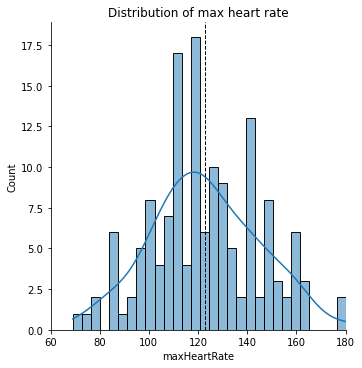

In [25]:
ax = sns.displot(data=df_va, x="maxHeartRate", kde=True, bins=30)
plt.xlim((60,df_va['maxHeartRate'].max()))
plt.axvline(df_va['maxHeartRate'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.title('Distribution of max heart rate')

The black dashed line represents the median value ~ 122.

This histogram appears as a normal one, so replacing missing values with mean value is a suitable option. Group the data in 'maxHeartRate' by 'diagnosis' and replace the missing values with the mean value for each diagnosis category.

In [26]:
s = df_va.groupby('diagnosis').apply(lambda x: round(x['maxHeartRate'].mean()))
s

diagnosis
0    125
1    124
2    123
3    119
4    118
dtype: int64

Find an example NaN(s), replace all with mean value and check whether the new value is as expected based on the diagnosis category. In this case, the replacement is successful.

In [27]:
df_va[['diagnosis','maxHeartRate']].query('maxHeartRate == "NaN"').head(5)

,diagnosis,maxHeartRate
14,1,NaN
24,0,NaN
27,2,NaN
30,3,NaN
31,3,NaN


In [28]:
df_va['maxHeartRate'].fillna(df_va['diagnosis'].map(s), inplace=True)
df_va.loc[14]

age                     63
sex                      1
chestPain                3
restBloodPressure      131
cholesterol              0
highBloodSugar           0
electrocardiography      2
maxHeartRate           124
sportAngina            NaN
STdepression           NaN
STsegmentSlope         NaN
majorVesselsNum        NaN
thalStatus             NaN
diagnosis                1
Name: 14, dtype: object

##### SPORTANGINA: category | MODE

In [29]:
s = df_va.groupby('diagnosis').apply(lambda x: round(x['sportAngina'].mode()))
s

,0
diagnosis,
0,0.0
1,1.0
2,1.0
3,1.0
4,1.0


Replace all missing values in column 'sportAngina' with the corresponding value depending on the diagnosis. Find an example NaN(s), replace all with mode value and check whether the new value is as expected based on the diagnosis category. In this case, the replacement is successful.

In [30]:
df_va[['diagnosis','sportAngina']].query('sportAngina == "NaN"').head(5)

,diagnosis,sportAngina
14,1,NaN
24,0,NaN
27,2,NaN
30,3,NaN
31,3,NaN


In [31]:
df_va['sportAngina'] = df_va['sportAngina'].fillna(df_va.groupby('diagnosis')['sportAngina'].transform(lambda x: x.fillna(x.mode()[0])))
df_va.loc[14]

age                     63
sex                      1
chestPain                3
restBloodPressure      131
cholesterol              0
highBloodSugar           0
electrocardiography      2
maxHeartRate           124
sportAngina              1
STdepression           NaN
STsegmentSlope         NaN
majorVesselsNum        NaN
thalStatus             NaN
diagnosis                1
Name: 14, dtype: object

##### STDEPRESSION: float | MEAN

Text(0.5, 1.0, 'Distribution of ST depression')

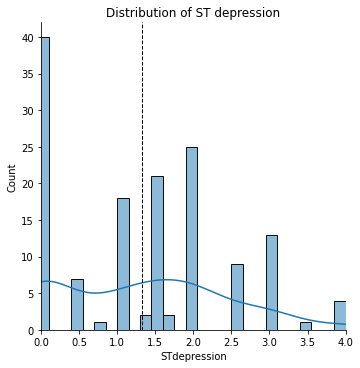

In [32]:
ax = sns.displot(data=df_va, x="STdepression", kde=True, bins=30)
plt.xlim((0,df_va['STdepression'].max()))
plt.axvline(df_va['STdepression'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.title('Distribution of ST depression')

The black dashed line represents the median value ~ 1.30.

This histogram is close to a normal one, so replacing missing values with mean value is a suitable option. Group the data in 'STdepression' by 'diagnosis' and replace the missing values with the mean value for each diagnosis category.

In [33]:
s = df_va.groupby('diagnosis').apply(lambda x: round(x['STdepression'].mean(), 2))
s

diagnosis
0    0.74
1    1.02
2    1.47
3    1.68
4    3.06
dtype: float64

Find an example NaN(s), replace all with mean value and check whether the new value is as expected based on the diagnosis category. In this case, the replacement is successful.

In [34]:
df_va[['diagnosis','STdepression']].query('STdepression == "NaN"').head(5)

,diagnosis,STdepression
14,1,NaN
24,0,NaN
27,2,NaN
30,3,NaN
31,3,NaN


In [35]:
df_va['STdepression'].fillna(df_va['diagnosis'].map(s), inplace=True)
df_va.loc[14]

age                      63
sex                       1
chestPain                 3
restBloodPressure       131
cholesterol               0
highBloodSugar            0
electrocardiography       2
maxHeartRate            124
sportAngina               1
STdepression           1.02
STsegmentSlope          NaN
majorVesselsNum         NaN
thalStatus              NaN
diagnosis                 1
Name: 14, dtype: object

##### STSEGMENTSLOPE: category | MODE

In [36]:
s = df_va.groupby('diagnosis').apply(lambda x: round(x['STsegmentSlope'].mode()))
s

,0
diagnosis,
0,2.0
1,2.0
2,2.0
3,2.0
4,3.0


Replace all missing values in column 'STsegmentSlope' with the corresponding value depending on the diagnosis. Find an example NaN(s), replace all with mode value and check whether the new value is as expected based on the diagnosis category. In this case, the replacement is successful.

In [37]:
df_va[['diagnosis','STsegmentSlope']].query('STsegmentSlope == "NaN"').head(5)

,diagnosis,STsegmentSlope
2,0,NaN
7,3,NaN
11,0,NaN
14,1,NaN
16,0,NaN


In [38]:
df_va['STsegmentSlope'] = df_va['STsegmentSlope'].fillna(df_va.groupby('diagnosis')['STsegmentSlope'].transform(lambda x: x.fillna(x.mode()[0])))
df_va.loc[7]

age                     65
sex                      1
chestPain                4
restBloodPressure      150
cholesterol            236
highBloodSugar           1
electrocardiography      1
maxHeartRate           105
sportAngina              1
STdepression             0
STsegmentSlope           2
majorVesselsNum        NaN
thalStatus             NaN
diagnosis                3
Name: 7, dtype: object

Finally, check whether all null values have been replaced with a meaningful value. As apparent, the manipulations were successfully executed - 200 non-null cells out of 200 entries in total per each attribute.

In [39]:
df_va.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 1 to 200
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  200 non-null    int64  
 1   sex                  200 non-null    int64  
 2   chestPain            200 non-null    int64  
 3   restBloodPressure    200 non-null    float64
 4   cholesterol          200 non-null    float64
 5   highBloodSugar       200 non-null    float64
 6   electrocardiography  200 non-null    int64  
 7   maxHeartRate         200 non-null    float64
 8   sportAngina          200 non-null    float64
 9   STdepression         200 non-null    float64
 10  STsegmentSlope       200 non-null    float64
 11  majorVesselsNum      2 non-null      object 
 12  thalStatus           34 non-null     object 
 13  diagnosis            200 non-null    int64  
dtypes: float64(7), int64(5), object(2)
memory usage: 22.0+ KB


#### DATA TYPES

The current status of the data types for this dataset are as follows:

In [40]:
df_va.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 1 to 200
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  200 non-null    int64  
 1   sex                  200 non-null    int64  
 2   chestPain            200 non-null    int64  
 3   restBloodPressure    200 non-null    float64
 4   cholesterol          200 non-null    float64
 5   highBloodSugar       200 non-null    float64
 6   electrocardiography  200 non-null    int64  
 7   maxHeartRate         200 non-null    float64
 8   sportAngina          200 non-null    float64
 9   STdepression         200 non-null    float64
 10  STsegmentSlope       200 non-null    float64
 11  majorVesselsNum      2 non-null      object 
 12  thalStatus           34 non-null     object 
 13  diagnosis            200 non-null    int64  
dtypes: float64(7), int64(5), object(2)
memory usage: 22.0+ KB


Change these according to section "Data insight".

##### Integer values

In [41]:
df_va = df_va.astype({'age':'int32', 'restBloodPressure': 'int32', 'cholesterol': 'int32', 
                                    'maxHeartRate': 'int32'})

##### Floating numbers

Change the data type of column 'majorVesselsNum' to 'float64' as it represents numerical values but is filled with many 'NaN's.

In [42]:
df_va = df_va.astype({'STdepression':'float64', 'majorVesselsNum': 'float64', 'thalStatus':'float64'})

##### Categorical data

In [43]:
df_va['sex'] = df_va['sex'].astype('int32')
df_va['sex'] = df_va['sex'].astype('category')

In [44]:
df_va['chestPain'] = df_va['chestPain'].astype('int32')
df_va['chestPain'] = df_va['chestPain'].astype('category')

In [45]:
df_va['highBloodSugar'] = df_va['highBloodSugar'].astype('int32')
df_va['highBloodSugar'] = df_va['highBloodSugar'].astype('category')

In [46]:
df_va['electrocardiography'] = df_va['electrocardiography'].astype('int32')
df_va['electrocardiography'] = df_va['electrocardiography'].astype('category')

In [47]:
df_va['sportAngina'] = df_va['sportAngina'].astype('int32')
df_va['sportAngina'] = df_va['sportAngina'].astype('category')

In [48]:
df_va['STsegmentSlope'] = df_va['STsegmentSlope'].astype('int32')
df_va['STsegmentSlope'] = df_va['STsegmentSlope'].astype('category')

Change the data type of column 'thalStatus' to 'category' as it represents categorical data but is filled with many 'NaN's.

In [49]:
df_va['thalStatus'] = df_va['thalStatus'].astype('float64')
df_va['thalStatus'] = df_va['thalStatus'].astype('category')

In [50]:
df_va['diagnosis'] = df_va['diagnosis'].astype('int32')
df_va['diagnosis'] = df_va['diagnosis'].astype('category')

To make sure everything has been adjusted successfully, review the statistics and a few rows from the dataset.

In [51]:
df_va.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 1 to 200
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   age                  200 non-null    int32   
 1   sex                  200 non-null    category
 2   chestPain            200 non-null    category
 3   restBloodPressure    200 non-null    int32   
 4   cholesterol          200 non-null    int32   
 5   highBloodSugar       200 non-null    category
 6   electrocardiography  200 non-null    category
 7   maxHeartRate         200 non-null    int32   
 8   sportAngina          200 non-null    category
 9   STdepression         200 non-null    float64 
 10  STsegmentSlope       200 non-null    category
 11  majorVesselsNum      2 non-null      float64 
 12  thalStatus           34 non-null     category
 13  diagnosis            200 non-null    category
dtypes: category(8), float64(2), int32(4)
memory usage: 8.9 KB


In [52]:
df_va

,age,sex,chestPain,restBloodPressure,cholesterol,highBloodSugar,electrocardiography,maxHeartRate,sportAngina,STdepression,STsegmentSlope,majorVesselsNum,thalStatus,diagnosis
1,63,1,4,140,260,0,1,112,1,3.00,2,NaN,NaN,2
2,44,1,4,130,209,0,1,127,0,0.00,2,NaN,NaN,0
3,60,1,4,132,218,0,1,140,1,1.50,3,NaN,NaN,2
4,55,1,4,142,228,0,1,149,1,2.50,1,NaN,NaN,1
5,66,1,3,110,213,1,2,99,1,1.30,2,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,54,0,4,127,333,1,1,154,0,0.00,2,NaN,NaN,1
197,62,1,1,130,139,0,1,125,0,0.74,2,NaN,NaN,0
198,55,1,4,122,223,1,1,100,0,0.00,2,NaN,6.0,2
199,58,1,4,130,385,1,2,125,0,0.74,2,NaN,NaN,0


The VA dataset has been prepared for fruitful analysis and further manipulations.

### Hungary dataset

In [53]:
df_hungary.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,40,1,2,140,289,0,0,172,0,0.0,-9,-9,-9,0
1,49,0,3,160,180,0,0,156,0,1.0,2,-9,-9,1
2,37,1,2,130,283,0,1,98,0,0.0,-9,-9,-9,0
3,48,0,4,138,214,0,0,108,1,1.5,2,-9,-9,3
4,54,1,3,150,-9,0,0,122,0,0.0,-9,-9,-9,0
5,39,1,3,120,339,0,0,170,0,0.0,-9,-9,-9,0
6,45,0,2,130,237,0,0,170,0,0.0,-9,-9,-9,0
7,54,1,2,110,208,0,0,142,0,0.0,-9,-9,-9,0
8,37,1,4,140,207,0,0,130,1,1.5,2,-9,-9,1
9,48,0,2,120,284,0,0,120,0,0.0,-9,-9,-9,0


#### RECORD ID

In [54]:
df_hungary.index = df_hungary.index + 1

#### ATTRIBUTE NAMING

In [55]:
df_hungary = df_hungary.rename(columns={'cp': 'chestPain', 'trestbps': 'restBloodPressure', 'chol': 'cholesterol',
                                            'fbs': 'highBloodSugar', 'restecg': 'electrocardiography', 'thalach': 'maxHeartRate',
                                            'exang': 'sportAngina', 'oldpeak': 'STdepression', 'slope': 'STsegmentSlope', 
                                            'ca': 'majorVesselsNum', 'thal': 'thalStatus', 'num': 'diagnosis'})
df_hungary

,age,sex,chestPain,restBloodPressure,cholesterol,highBloodSugar,electrocardiography,maxHeartRate,sportAngina,STdepression,STsegmentSlope,majorVesselsNum,thalStatus,diagnosis
1,40,1,2,140,289,0,0,172,0,0.0,-9,-9,-9,0
2,49,0,3,160,180,0,0,156,0,1.0,2,-9,-9,1
3,37,1,2,130,283,0,1,98,0,0.0,-9,-9,-9,0
4,48,0,4,138,214,0,0,108,1,1.5,2,-9,-9,3
5,54,1,3,150,-9,0,0,122,0,0.0,-9,-9,-9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,48,0,2,-9,308,0,1,-9,-9,2.0,1,-9,-9,0
291,36,1,2,120,166,0,0,180,0,0.0,-9,-9,-9,0
292,48,1,3,110,211,0,0,138,0,0.0,-9,-9,6,0
293,47,0,2,140,257,0,0,135,0,1.0,1,-9,-9,0


#### NOT PROVIDED VALUES

Get all records with '-9' as value

In [56]:
df_hungary[df_hungary.eq(-9).any(1)]

,age,sex,chestPain,restBloodPressure,cholesterol,highBloodSugar,electrocardiography,maxHeartRate,sportAngina,STdepression,STsegmentSlope,majorVesselsNum,thalStatus,diagnosis
1,40,1,2,140,289,0,0,172,0,0.0,-9,-9,-9,0
2,49,0,3,160,180,0,0,156,0,1.0,2,-9,-9,1
3,37,1,2,130,283,0,1,98,0,0.0,-9,-9,-9,0
4,48,0,4,138,214,0,0,108,1,1.5,2,-9,-9,3
5,54,1,3,150,-9,0,0,122,0,0.0,-9,-9,-9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,48,0,2,-9,308,0,1,-9,-9,2.0,1,-9,-9,0
291,36,1,2,120,166,0,0,180,0,0.0,-9,-9,-9,0
292,48,1,3,110,211,0,0,138,0,0.0,-9,-9,6,0
293,47,0,2,140,257,0,0,135,0,1.0,1,-9,-9,0


The whole dataset is full of these values => replace them with more appropriate naming, like 'NAN'

In [57]:
df_hungary = df_hungary.replace(-9, np.nan)
df_hungary

,age,sex,chestPain,restBloodPressure,cholesterol,highBloodSugar,electrocardiography,maxHeartRate,sportAngina,STdepression,STsegmentSlope,majorVesselsNum,thalStatus,diagnosis
1,40,1,2,140.0,289.0,0.0,0.0,172.0,0.0,0.0,NaN,NaN,NaN,0
2,49,0,3,160.0,180.0,0.0,0.0,156.0,0.0,1.0,2.0,NaN,NaN,1
3,37,1,2,130.0,283.0,0.0,1.0,98.0,0.0,0.0,NaN,NaN,NaN,0
4,48,0,4,138.0,214.0,0.0,0.0,108.0,1.0,1.5,2.0,NaN,NaN,3
5,54,1,3,150.0,NaN,0.0,0.0,122.0,0.0,0.0,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,48,0,2,NaN,308.0,0.0,1.0,NaN,NaN,2.0,1.0,NaN,NaN,0
291,36,1,2,120.0,166.0,0.0,0.0,180.0,0.0,0.0,NaN,NaN,NaN,0
292,48,1,3,110.0,211.0,0.0,0.0,138.0,0.0,0.0,NaN,NaN,6.0,0
293,47,0,2,140.0,257.0,0.0,0.0,135.0,0.0,1.0,1.0,NaN,NaN,0


In [58]:
df_hungary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 1 to 294
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  294 non-null    int64  
 1   sex                  294 non-null    int64  
 2   chestPain            294 non-null    int64  
 3   restBloodPressure    293 non-null    float64
 4   cholesterol          271 non-null    float64
 5   highBloodSugar       286 non-null    float64
 6   electrocardiography  293 non-null    float64
 7   maxHeartRate         293 non-null    float64
 8   sportAngina          293 non-null    float64
 9   STdepression         294 non-null    float64
 10  STsegmentSlope       104 non-null    float64
 11  majorVesselsNum      4 non-null      float64
 12  thalStatus           28 non-null     float64
 13  diagnosis            294 non-null    int64  
dtypes: float64(10), int64(4)
memory usage: 32.3 KB


Columns 'majorVesselsNum' and 'thalStatus' have the majority of the values 'NaN'. Therefore, much information cannot be extracted from these attributes in the current dataset. However, dropping these columns would intervine combining all datasets as the other 3 data resources might contain meaningful data for these columns. Leave both columns with the 'NaN' values for now and do not count on them when manipulating the Hungary dataset.

Before filling in the missing data, change data types of all columns with null values to 'float64', because it allows for NaN values unlike 'int32'.

In [59]:
df_hungary = df_hungary.astype({'restBloodPressure':'float64', 'cholesterol': 'float64', 'highBloodSugar': 'float64', 
                      'electrocardiography': 'float64', 'maxHeartRate': 'float64', 'sportAngina': 'float64', 
                      'STsegmentSlope': 'float64'})

##### RESTBLOODPRESSURE: integer | Mean 

Text(0.5, 1.0, 'Distribution of resting blood pressure')

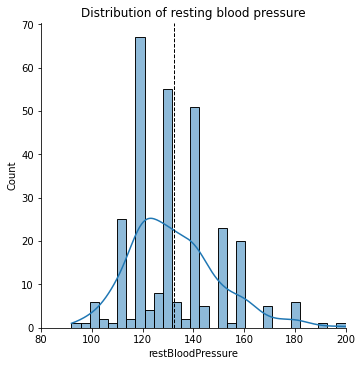

In [60]:
ax = sns.displot(data=df_hungary, x="restBloodPressure", kde=True, bins=30)
plt.xlim((80,df_hungary['restBloodPressure'].max()))
plt.axvline(df_hungary['restBloodPressure'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.title('Distribution of resting blood pressure')

The black dashed line represents the median value ~ 133.

This histogram appears as a normal one, so replacing the missing value with mean value is a suitable option. Group the data in 'restBloodPressure' by 'diagnosis' and replace the missing values with the mean value for each diagnosis category.

In [61]:
s = df_hungary.groupby('diagnosis').apply(lambda x: round(x['restBloodPressure'].mean()))
s

diagnosis
0    131
1    128
2    138
3    141
4    142
dtype: int64

Find the missing NaN, replace it with mean value and check whether the new value is as expected based on the diagnosis category. In this case, the replacement is successful.

In [62]:
df_hungary[['diagnosis','restBloodPressure']].query('restBloodPressure == "NaN"').tail(5)

,diagnosis,restBloodPressure
290,0,NaN


In [63]:
df_hungary['restBloodPressure'].fillna(df_hungary['diagnosis'].map(s), inplace=True)
df_hungary.loc[290]

age                     48.0
sex                      0.0
chestPain                2.0
restBloodPressure      131.0
cholesterol            308.0
highBloodSugar           0.0
electrocardiography      1.0
maxHeartRate             NaN
sportAngina              NaN
STdepression             2.0
STsegmentSlope           1.0
majorVesselsNum          NaN
thalStatus               NaN
diagnosis                0.0
Name: 290, dtype: float64

##### CHOLESTEROL: integer | Mean 

Text(0.5, 1.0, 'Distribution of cholesterol levels')

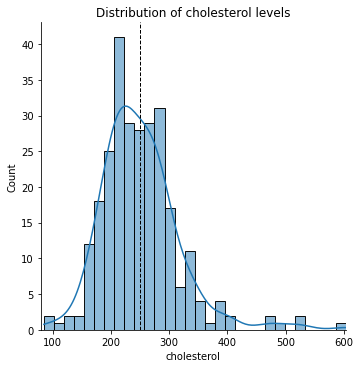

In [64]:
ax = sns.displot(data=df_hungary, x="cholesterol", kde=True, bins=30)
plt.xlim((80,df_hungary['cholesterol'].max()))
plt.axvline(df_hungary['cholesterol'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.title('Distribution of cholesterol levels')

The black dashed line represents the median value ~ 250.

This histogram appears as a normal one, so replacing missing values with mean value is a suitable option. Group the data in 'cholesterol' by 'diagnosis' and replace the missing values with the mean value for each diagnosis category.

In [65]:
df_hungary.groupby('diagnosis')['cholesterol'].mean().round(0)

diagnosis
0    240.0
1    245.0
2    281.0
3    274.0
4    301.0
Name: cholesterol, dtype: float64

In [66]:
s = df_hungary.groupby('diagnosis').apply(lambda x: round(x['cholesterol'].mean()))
s

diagnosis
0    240
1    245
2    281
3    274
4    301
dtype: int64

Find an example NaN(s), replace all with mean value and check whether the new value is as expected based on the diagnosis category. In this case, the replacement is successful.

In [67]:
df_hungary[['diagnosis','cholesterol']].query('cholesterol == "NaN"').tail(5)

,diagnosis,cholesterol
271,0,NaN
276,0,NaN
279,2,NaN
288,0,NaN
289,0,NaN


In [68]:
df_hungary['cholesterol'].fillna(df_hungary['diagnosis'].map(s), inplace=True)
df_hungary.loc[279]

age                     52.0
sex                      1.0
chestPain                4.0
restBloodPressure      170.0
cholesterol            281.0
highBloodSugar           0.0
electrocardiography      0.0
maxHeartRate           126.0
sportAngina              1.0
STdepression             1.5
STsegmentSlope           2.0
majorVesselsNum          NaN
thalStatus               NaN
diagnosis                2.0
Name: 279, dtype: float64

##### HIGHBLOODSUGAR: category | MODE

In [69]:
s = df_hungary.groupby('diagnosis').apply(lambda x: x['highBloodSugar'].mode())
s

,0
diagnosis,
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


The mode value of 0 preponderates for all variations of diagnosis. Therefore, replace all missing values in column 'highBloodSugar' with 0. Find example NaN(s), replace all with mode value and check whether the new value is as expected. In this case, the replacement is successful.

In [70]:
df_hungary[['diagnosis','highBloodSugar']].query('highBloodSugar == "NaN"').tail(5)

,diagnosis,highBloodSugar
189,1,NaN
198,0,NaN
215,0,NaN
234,0,NaN
236,0,NaN


In [71]:
df_hungary['highBloodSugar'] = df_hungary['highBloodSugar'].fillna(df_hungary.groupby('diagnosis')['highBloodSugar'].transform(lambda x: x.fillna(x.mode()[0])))

In [72]:
df_hungary.loc[189]

age                     41.0
sex                      1.0
chestPain                4.0
restBloodPressure      120.0
cholesterol            237.0
highBloodSugar           0.0
electrocardiography      0.0
maxHeartRate           138.0
sportAngina              1.0
STdepression             1.0
STsegmentSlope           2.0
majorVesselsNum          NaN
thalStatus               NaN
diagnosis                1.0
Name: 189, dtype: float64

##### ELECTROCARDIOGRAPHY: category | MODE

In [73]:
s = df_hungary.groupby('diagnosis').apply(lambda x: x['electrocardiography'].mode())
s

,0
diagnosis,
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


The mode value of 0 preponderates for all variations of diagnosis. Therefore, replace all missing values in column 'highBloodSugar' with 0. Find example NaN(s), replace all with mode value and check whether the new value is as expected. In this case, the replacement is successful.

In [74]:
df_hungary[['diagnosis','electrocardiography']].query('electrocardiography == "NaN"').tail(5)

,diagnosis,electrocardiography
239,3,NaN


In [75]:
df_hungary['electrocardiography'] = df_hungary['electrocardiography'].fillna(df_hungary.groupby('diagnosis')['electrocardiography'].transform(lambda x: x.fillna(x.mode()[0])))

In [76]:
df_hungary.loc[239]

age                     55.0
sex                      1.0
chestPain                1.0
restBloodPressure      140.0
cholesterol            295.0
highBloodSugar           0.0
electrocardiography      0.0
maxHeartRate           136.0
sportAngina              0.0
STdepression             0.0
STsegmentSlope           NaN
majorVesselsNum          NaN
thalStatus               NaN
diagnosis                3.0
Name: 239, dtype: float64

##### MAXHEARTRATE: integer | MEAN

Text(0.5, 1.0, 'Distribution of max heart rate')

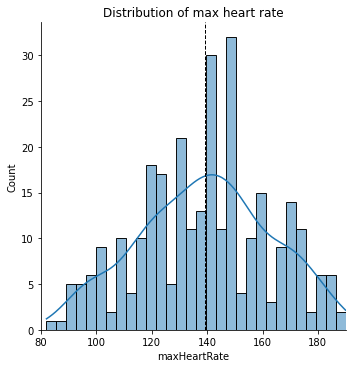

In [77]:
ax = sns.displot(data=df_hungary, x="maxHeartRate", kde=True, bins=30)
plt.xlim((80,df_hungary['maxHeartRate'].max()))
plt.axvline(df_hungary['maxHeartRate'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.title('Distribution of max heart rate')

The black dashed line represents the median value ~ 138.

This histogram appears as a normal one, so replacing missing values with mean value is a suitable option. Group the data in 'maxHeartRate' by 'diagnosis' and replace the missing values with the mean value for each diagnosis category.

In [78]:
s = df_hungary.groupby('diagnosis').apply(lambda x: round(x['maxHeartRate'].mean()))
s

diagnosis
0    145
1    139
2    124
3    123
4    122
dtype: int64

Find an example NaN(s), replace all with mean value and check whether the new value is as expected based on the diagnosis category. In this case, the replacement is successful.

In [79]:
df_hungary[['diagnosis','maxHeartRate']].query('maxHeartRate == "NaN"')

,diagnosis,maxHeartRate
290,0,NaN


In [80]:
df_hungary['maxHeartRate'].fillna(df_hungary['diagnosis'].map(s), inplace=True)
df_hungary.loc[290]

age                     48.0
sex                      0.0
chestPain                2.0
restBloodPressure      131.0
cholesterol            308.0
highBloodSugar           0.0
electrocardiography      1.0
maxHeartRate           145.0
sportAngina              NaN
STdepression             2.0
STsegmentSlope           1.0
majorVesselsNum          NaN
thalStatus               NaN
diagnosis                0.0
Name: 290, dtype: float64

##### SPORTANGINA: category | MODE

In [81]:
s = df_hungary.groupby('diagnosis').apply(lambda x: round(x['sportAngina'].mode()))
s

,0
diagnosis,
0,0.0
1,1.0
2,1.0
3,1.0
4,1.0


Replace all missing values in column 'sportAngina' with the corresponding value depending on the diagnosis. Find an example NaN(s), replace all with mode value and check whether the new value is as expected based on the diagnosis category. In this case, the replacement is successful.

In [82]:
df_hungary[['diagnosis','sportAngina']].query('sportAngina == "NaN"')

,diagnosis,sportAngina
290,0,NaN


In [83]:
df_hungary['sportAngina'] = df_hungary['sportAngina'].fillna(df_hungary.groupby('diagnosis')['sportAngina'].transform(lambda x: x.fillna(x.mode()[0])))
df_hungary.loc[290]

age                     48.0
sex                      0.0
chestPain                2.0
restBloodPressure      131.0
cholesterol            308.0
highBloodSugar           0.0
electrocardiography      1.0
maxHeartRate           145.0
sportAngina              0.0
STdepression             2.0
STsegmentSlope           1.0
majorVesselsNum          NaN
thalStatus               NaN
diagnosis                0.0
Name: 290, dtype: float64

##### STSEGMENTSLOPE: category | MODE

In [84]:
s = df_hungary.groupby('diagnosis').apply(lambda x: round(x['STsegmentSlope'].mode()))
s

,0
diagnosis,
0,2.0
1,2.0
2,2.0
3,2.0
4,2.0


Replace all missing values in column 'STsegmentSlope' with the corresponding value depending on the diagnosis. Find an example NaN(s), replace all with mode value and check whether the new value is as expected based on the diagnosis category. In this case, the replacement is successful.

In [85]:
df_hungary[['diagnosis','STsegmentSlope']].query('STsegmentSlope == "NaN"')

,diagnosis,STsegmentSlope
1,0,NaN
3,0,NaN
5,0,NaN
6,0,NaN
7,0,NaN
...,...,...
288,0,NaN
289,0,NaN
291,0,NaN
292,0,NaN


In [86]:
df_hungary['STsegmentSlope'] = df_hungary['STsegmentSlope'].fillna(df_hungary.groupby('diagnosis')['STsegmentSlope'].transform(lambda x: x.fillna(x.mode()[0])))
df_hungary.loc[291]

age                     36.0
sex                      1.0
chestPain                2.0
restBloodPressure      120.0
cholesterol            166.0
highBloodSugar           0.0
electrocardiography      0.0
maxHeartRate           180.0
sportAngina              0.0
STdepression             0.0
STsegmentSlope           2.0
majorVesselsNum          NaN
thalStatus               NaN
diagnosis                0.0
Name: 291, dtype: float64

Finally, check whether all null values have been replaced with a meaningful value. As apparent, the manipulations were successfully executed - 200 non-null cells out of 200 entries in total per each attribute.

In [87]:
df_hungary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 1 to 294
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  294 non-null    int64  
 1   sex                  294 non-null    int64  
 2   chestPain            294 non-null    int64  
 3   restBloodPressure    294 non-null    float64
 4   cholesterol          294 non-null    float64
 5   highBloodSugar       294 non-null    float64
 6   electrocardiography  294 non-null    float64
 7   maxHeartRate         294 non-null    float64
 8   sportAngina          294 non-null    float64
 9   STdepression         294 non-null    float64
 10  STsegmentSlope       294 non-null    float64
 11  majorVesselsNum      4 non-null      float64
 12  thalStatus           28 non-null     float64
 13  diagnosis            294 non-null    int64  
dtypes: float64(10), int64(4)
memory usage: 32.3 KB


#### DATA TYPES

The current status of the data types for this dataset are as follows:

In [88]:
df_hungary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 1 to 294
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  294 non-null    int64  
 1   sex                  294 non-null    int64  
 2   chestPain            294 non-null    int64  
 3   restBloodPressure    294 non-null    float64
 4   cholesterol          294 non-null    float64
 5   highBloodSugar       294 non-null    float64
 6   electrocardiography  294 non-null    float64
 7   maxHeartRate         294 non-null    float64
 8   sportAngina          294 non-null    float64
 9   STdepression         294 non-null    float64
 10  STsegmentSlope       294 non-null    float64
 11  majorVesselsNum      4 non-null      float64
 12  thalStatus           28 non-null     float64
 13  diagnosis            294 non-null    int64  
dtypes: float64(10), int64(4)
memory usage: 32.3 KB


Change these according to section "Data insight".

##### Integer values

In [89]:
df_hungary = df_hungary.astype({'age':'int32', 'restBloodPressure': 'int32', 'cholesterol': 'int32', 
                                    'maxHeartRate': 'int32'})

##### Floating numbers

In [90]:
df_hungary = df_hungary.astype({'STdepression':'float64'})

##### Categorical data

In [91]:
df_hungary['sex'] = df_hungary['sex'].astype('int32')
df_hungary['sex'] = df_hungary['sex'].astype('category')

In [92]:
df_hungary['chestPain'] = df_hungary['chestPain'].astype('int32')
df_hungary['chestPain'] = df_hungary['chestPain'].astype('category')

In [93]:
df_hungary['highBloodSugar'] = df_hungary['highBloodSugar'].astype('int32')
df_hungary['highBloodSugar'] = df_hungary['highBloodSugar'].astype('category')

In [94]:
df_hungary['electrocardiography'] = df_hungary['electrocardiography'].astype('int32')
df_hungary['electrocardiography'] = df_hungary['electrocardiography'].astype('category')

In [95]:
df_hungary['sportAngina'] = df_hungary['sportAngina'].astype('int32')
df_hungary['sportAngina'] = df_hungary['sportAngina'].astype('category')

In [96]:
df_hungary['STsegmentSlope'] = df_hungary['STsegmentSlope'].astype('int32')
df_hungary['STsegmentSlope'] = df_hungary['STsegmentSlope'].astype('category')

Change the data type of column 'thalStatus' to 'category' as it represents categorical data but is filled with many 'NaN's.

In [97]:
df_hungary['thalStatus'] = df_hungary['thalStatus'].astype('float64')
df_hungary['thalStatus'] = df_hungary['thalStatus'].astype('category')

In [98]:
df_hungary['diagnosis'] = df_hungary['diagnosis'].astype('int32')
df_hungary['diagnosis'] = df_hungary['diagnosis'].astype('category')

To make sure everything has been adjusted successfully, review the statistics and a few rows from the dataset.

In [99]:
df_hungary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 1 to 294
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   age                  294 non-null    int32   
 1   sex                  294 non-null    category
 2   chestPain            294 non-null    category
 3   restBloodPressure    294 non-null    int32   
 4   cholesterol          294 non-null    int32   
 5   highBloodSugar       294 non-null    category
 6   electrocardiography  294 non-null    category
 7   maxHeartRate         294 non-null    int32   
 8   sportAngina          294 non-null    category
 9   STdepression         294 non-null    float64 
 10  STsegmentSlope       294 non-null    category
 11  majorVesselsNum      4 non-null      float64 
 12  thalStatus           28 non-null     category
 13  diagnosis            294 non-null    category
dtypes: category(8), float64(2), int32(4)
memory usage: 12.6 KB


In [100]:
df_hungary

,age,sex,chestPain,restBloodPressure,cholesterol,highBloodSugar,electrocardiography,maxHeartRate,sportAngina,STdepression,STsegmentSlope,majorVesselsNum,thalStatus,diagnosis
1,40,1,2,140,289,0,0,172,0,0.0,2,NaN,NaN,0
2,49,0,3,160,180,0,0,156,0,1.0,2,NaN,NaN,1
3,37,1,2,130,283,0,1,98,0,0.0,2,NaN,NaN,0
4,48,0,4,138,214,0,0,108,1,1.5,2,NaN,NaN,3
5,54,1,3,150,240,0,0,122,0,0.0,2,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,48,0,2,131,308,0,1,145,0,2.0,1,NaN,NaN,0
291,36,1,2,120,166,0,0,180,0,0.0,2,NaN,NaN,0
292,48,1,3,110,211,0,0,138,0,0.0,2,NaN,6.0,0
293,47,0,2,140,257,0,0,135,0,1.0,1,NaN,NaN,0


The Hungary dataset has been prepared for fruitful analysis and further manipulations.

### Switzerland dataset

In [101]:
df_switzerland.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,32,1,1,95,0,?,0,127,0,.7,1,?,?,1
1,34,1,4,115,0,?,?,154,0,.2,1,?,?,1
2,35,1,4,?,0,?,0,130,1,?,?,?,7,3
3,36,1,4,110,0,?,0,125,1,1,2,?,6,1
4,38,0,4,105,0,?,0,166,0,2.8,1,?,?,2
5,38,0,4,110,0,0,0,156,0,0,2,?,3,1
6,38,1,3,100,0,?,0,179,0,-1.1,1,?,?,0
7,38,1,3,115,0,0,0,128,1,0,2,?,7,1
8,38,1,4,135,0,?,0,150,0,0,?,?,3,2
9,38,1,4,150,0,?,0,120,1,?,?,?,3,1


#### RECORD ID

In [102]:
df_switzerland.index = df_switzerland.index + 1

#### ATTRIBUTE NAMING

In [103]:
df_switzerland = df_switzerland.rename(columns={'cp': 'chestPain', 'trestbps': 'restBloodPressure', 'chol': 'cholesterol',
                                            'fbs': 'highBloodSugar', 'restecg': 'electrocardiography', 'thalach': 'maxHeartRate',
                                            'exang': 'sportAngina', 'oldpeak': 'STdepression', 'slope': 'STsegmentSlope', 
                                            'ca': 'majorVesselsNum', 'thal': 'thalStatus', 'num': 'diagnosis'})
df_switzerland

,age,sex,chestPain,restBloodPressure,cholesterol,highBloodSugar,electrocardiography,maxHeartRate,sportAngina,STdepression,STsegmentSlope,majorVesselsNum,thalStatus,diagnosis
1,32,1,1,95,0,?,0,127,0,.7,1,?,?,1
2,34,1,4,115,0,?,?,154,0,.2,1,?,?,1
3,35,1,4,?,0,?,0,130,1,?,?,?,7,3
4,36,1,4,110,0,?,0,125,1,1,2,?,6,1
5,38,0,4,105,0,?,0,166,0,2.8,1,?,?,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,70,1,4,115,0,0,1,92,1,0,2,?,7,1
120,70,1,4,140,0,1,0,157,1,2,2,?,7,3
121,72,1,3,160,0,?,2,114,0,1.6,2,2,?,0
122,73,0,3,160,0,0,1,121,0,0,1,?,3,1


#### NOT PROVIDED VALUES

Get all records with '?' as value

In [104]:
df_switzerland[df_switzerland.eq('?').any(1)]

,age,sex,chestPain,restBloodPressure,cholesterol,highBloodSugar,electrocardiography,maxHeartRate,sportAngina,STdepression,STsegmentSlope,majorVesselsNum,thalStatus,diagnosis
1,32,1,1,95,0,?,0,127,0,.7,1,?,?,1
2,34,1,4,115,0,?,?,154,0,.2,1,?,?,1
3,35,1,4,?,0,?,0,130,1,?,?,?,7,3
4,36,1,4,110,0,?,0,125,1,1,2,?,6,1
5,38,0,4,105,0,?,0,166,0,2.8,1,?,?,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,70,1,4,115,0,0,1,92,1,0,2,?,7,1
120,70,1,4,140,0,1,0,157,1,2,2,?,7,3
121,72,1,3,160,0,?,2,114,0,1.6,2,2,?,0
122,73,0,3,160,0,0,1,121,0,0,1,?,3,1


The whole dataset is full of these values => replace them with more appropriate naming, like 'NAN'

In [105]:
df_switzerland = df_switzerland.replace('?', np.nan)
df_switzerland

,age,sex,chestPain,restBloodPressure,cholesterol,highBloodSugar,electrocardiography,maxHeartRate,sportAngina,STdepression,STsegmentSlope,majorVesselsNum,thalStatus,diagnosis
1,32,1,1,95,0,NaN,0,127,0,.7,1,NaN,NaN,1
2,34,1,4,115,0,NaN,NaN,154,0,.2,1,NaN,NaN,1
3,35,1,4,NaN,0,NaN,0,130,1,NaN,NaN,NaN,7,3
4,36,1,4,110,0,NaN,0,125,1,1,2,NaN,6,1
5,38,0,4,105,0,NaN,0,166,0,2.8,1,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,70,1,4,115,0,0,1,92,1,0,2,NaN,7,1
120,70,1,4,140,0,1,0,157,1,2,2,NaN,7,3
121,72,1,3,160,0,NaN,2,114,0,1.6,2,2,NaN,0
122,73,0,3,160,0,0,1,121,0,0,1,NaN,3,1


In [106]:
df_switzerland.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 1 to 123
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  123 non-null    int64 
 1   sex                  123 non-null    int64 
 2   chestPain            123 non-null    int64 
 3   restBloodPressure    121 non-null    object
 4   cholesterol          123 non-null    int64 
 5   highBloodSugar       48 non-null     object
 6   electrocardiography  122 non-null    object
 7   maxHeartRate         122 non-null    object
 8   sportAngina          122 non-null    object
 9   STdepression         117 non-null    object
 10  STsegmentSlope       106 non-null    object
 11  majorVesselsNum      5 non-null      object
 12  thalStatus           71 non-null     object
 13  diagnosis            123 non-null    int64 
dtypes: int64(5), object(9)
memory usage: 13.6+ KB


Column 'majorVesselsNum' has the majority of the values 'NaN'. Therefore, much information cannot be extracted from this attribute in the current dataset. However, dropping this column would intervine combining all datasets as the other 3 data resources might contain meaningful data for this column. Leave the column with the 'NaN' values for now and do not count on them when manipulating the Switzerland dataset.

Before filling in the missing data, change data types of all columns with null values to 'float64', because it allows for NaN values unlike 'int32'.

In [107]:
df_switzerland = df_switzerland.astype({'restBloodPressure':'float64', 'highBloodSugar': 'float64', 
                      'electrocardiography': 'float64', 'maxHeartRate': 'float64', 'sportAngina': 'float64', 
                      'STdepression': 'float64', 'STsegmentSlope': 'float64', 'thalStatus': 'float64'})

##### RESTBLOODPRESSURE: integer | MODE

Text(0.5, 1.0, 'Distribution of resting blood pressure')

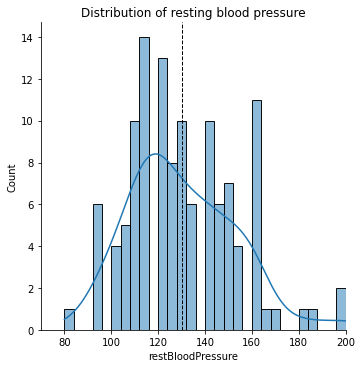

In [108]:
ax = sns.displot(data=df_switzerland, x="restBloodPressure", kde=True, bins=30)
plt.xlim((70,df_switzerland['restBloodPressure'].max()))
plt.axvline(df_switzerland['restBloodPressure'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.title('Distribution of resting blood pressure')

The black dashed line represents the median value ~ 130.

This histogram does not appear as normalised, so replacing the missing value with mode value is a suitable option. Group the data in 'restBloodPressure' by 'diagnosis' and replace the missing values with the mode value for each diagnosis category.

In [109]:
s = df_switzerland.groupby('diagnosis').apply(lambda x: round(x['restBloodPressure'].value_counts().index[0]))
s

diagnosis
0    160
1    115
2    140
3    150
4    130
dtype: int64

Find the missing NaN, replace it with mean value and check whether the new value is as expected based on the diagnosis category. In this case, the replacement is successful.

In [110]:
df_switzerland[['diagnosis','restBloodPressure']].query('restBloodPressure == "NaN"').tail(5)

,diagnosis,restBloodPressure
3,3,NaN
118,3,NaN


In [111]:
df_switzerland['restBloodPressure'].fillna(df_switzerland['diagnosis'].map(s), inplace=True)
df_switzerland.loc[3]

age                     35
sex                      1
chestPain                4
restBloodPressure      150
cholesterol              0
highBloodSugar         NaN
electrocardiography      0
maxHeartRate           130
sportAngina              1
STdepression           NaN
STsegmentSlope         NaN
majorVesselsNum        NaN
thalStatus               7
diagnosis                3
Name: 3, dtype: object

##### HIGHBLOODSUGAR: category | MODE

In [112]:
s = df_switzerland.groupby('diagnosis').apply(lambda x: x['highBloodSugar'].mode())
s

,0
diagnosis,
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


The mode value of 0 preponderates for all variations of diagnosis. Therefore, replace all missing values in column 'highBloodSugar' with 0. Find example NaN(s), replace all with mode value and check whether the new value is as expected. In this case, the replacement is successful.

In [113]:
df_switzerland[['diagnosis','highBloodSugar']].query('highBloodSugar == "NaN"').tail(5)

,diagnosis,highBloodSugar
110,0,NaN
112,1,NaN
116,1,NaN
121,0,NaN
123,1,NaN


In [114]:
df_switzerland['highBloodSugar'] = df_switzerland['highBloodSugar'].fillna(df_switzerland.groupby('diagnosis')['highBloodSugar'].transform(lambda x: x.fillna(x.mode()[0])))

In [115]:
df_switzerland.loc[110]

age                     65
sex                      1
chestPain                4
restBloodPressure      155
cholesterol              0
highBloodSugar           0
electrocardiography      0
maxHeartRate           154
sportAngina              0
STdepression             1
STsegmentSlope           1
majorVesselsNum        NaN
thalStatus             NaN
diagnosis                0
Name: 110, dtype: object

##### ELECTROCARDIOGRAPHY: category | MODE

In [116]:
s = df_switzerland.groupby('diagnosis').apply(lambda x: x['electrocardiography'].mode())
s

,0
diagnosis,
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


The mode value of 0 preponderates for all variations of diagnosis. Therefore, replace all missing values in column 'highBloodSugar' with 0. Find example NaN(s), replace all with mode value and check whether the new value is as expected. In this case, the replacement is successful.

In [117]:
df_switzerland[['diagnosis','electrocardiography']].query('electrocardiography == "NaN"').tail(5)

,diagnosis,electrocardiography
2,1,NaN


In [118]:
df_switzerland['electrocardiography'] = df_switzerland['electrocardiography'].fillna(df_switzerland.groupby('diagnosis')['electrocardiography'].transform(lambda x: x.fillna(x.mode()[0])))

In [119]:
df_switzerland.loc[2]

age                     34
sex                      1
chestPain                4
restBloodPressure      115
cholesterol              0
highBloodSugar           0
electrocardiography      0
maxHeartRate           154
sportAngina              0
STdepression           0.2
STsegmentSlope           1
majorVesselsNum        NaN
thalStatus             NaN
diagnosis                1
Name: 2, dtype: object

##### MAXHEARTRATE: integer | MEAN

Text(0.5, 1.0, 'Distribution of max heart rate')

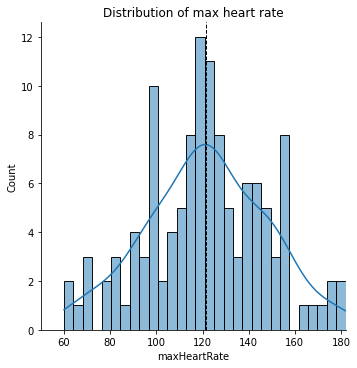

In [120]:
ax = sns.displot(data=df_switzerland, x="maxHeartRate", kde=True, bins=30)
plt.xlim((50,df_switzerland['maxHeartRate'].max()))
plt.axvline(df_switzerland['maxHeartRate'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.title('Distribution of max heart rate')

The black dashed line represents the median value ~ 121.

This histogram appears as a normal one, so replacing missing values with mean value is a suitable option. Group the data in 'maxHeartRate' by 'diagnosis' and replace the missing values with the mean value for each diagnosis category.

In [121]:
s = df_switzerland.groupby('diagnosis').apply(lambda x: round(x['maxHeartRate'].mean()))
s

diagnosis
0    137
1    125
2    126
3    108
4    110
dtype: int64

Find an example NaN(s), replace all with mean value and check whether the new value is as expected based on the diagnosis category. In this case, the replacement is successful.

In [122]:
df_switzerland[['diagnosis','maxHeartRate']].query('maxHeartRate == "NaN"')

,diagnosis,maxHeartRate
118,3,NaN


In [123]:
df_switzerland['maxHeartRate'].fillna(df_switzerland['diagnosis'].map(s), inplace=True)
df_switzerland.loc[118]

age                     69
sex                      1
chestPain                4
restBloodPressure      150
cholesterol              0
highBloodSugar           0
electrocardiography      1
maxHeartRate           108
sportAngina            NaN
STdepression           NaN
STsegmentSlope         NaN
majorVesselsNum        NaN
thalStatus               7
diagnosis                3
Name: 118, dtype: object

##### SPORTANGINA: category | MODE

In [124]:
s = df_switzerland.groupby('diagnosis').apply(lambda x: round(x['sportAngina'].mode()))
s

,0
diagnosis,
0,0.0
1,0.0
2,0.0
3,1.0
4,0.0


Replace all missing values in column 'sportAngina' with the corresponding value depending on the diagnosis. Find an example NaN(s), replace all with mode value and check whether the new value is as expected based on the diagnosis category. In this case, the replacement is successful.

In [125]:
df_switzerland[['diagnosis','sportAngina']].query('sportAngina == "NaN"')

,diagnosis,sportAngina
118,3,NaN


In [126]:
df_switzerland['sportAngina'] = df_switzerland['sportAngina'].fillna(df_switzerland.groupby('diagnosis')['sportAngina'].transform(lambda x: x.fillna(x.mode()[0])))
df_switzerland.loc[118]

age                     69
sex                      1
chestPain                4
restBloodPressure      150
cholesterol              0
highBloodSugar           0
electrocardiography      1
maxHeartRate           108
sportAngina              1
STdepression           NaN
STsegmentSlope         NaN
majorVesselsNum        NaN
thalStatus               7
diagnosis                3
Name: 118, dtype: object

##### STDEPRESSION: float | MEAN

Text(0.5, 1.0, 'Distribution of ST depression')

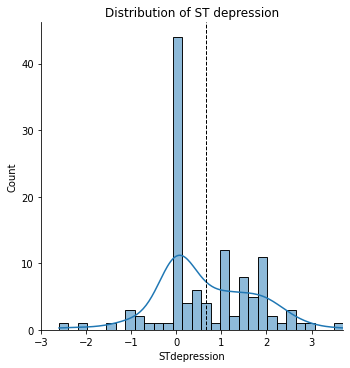

In [127]:
ax = sns.displot(data=df_switzerland, x="STdepression", kde=True, bins=30)
plt.xlim((-3,df_switzerland['STdepression'].max()))
plt.axvline(df_switzerland['STdepression'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.title('Distribution of ST depression')

The black dashed line represents the median value ~ 0.7.

This histogram appears as a normal one, so replacing missing values with mean value is a suitable option. Group the data in 'STdepression' by 'diagnosis' and replace the missing values with the mean value for each diagnosis category.

In [128]:
s = df_switzerland.groupby('diagnosis').apply(lambda x: round(x['STdepression'].mean(), 2))
s

diagnosis
0    0.54
1    0.43
2    0.73
3    0.95
4    0.96
dtype: float64

Find an example NaN(s), replace all with mean value and check whether the new value is as expected based on the diagnosis category. In this case, the replacement is successful.

In [129]:
df_switzerland[['diagnosis','STdepression']].query('STdepression == "NaN"').head(5)

,diagnosis,STdepression
3,3,NaN
10,1,NaN
40,2,NaN
109,3,NaN
111,3,NaN


In [130]:
df_switzerland['STdepression'].fillna(df_switzerland['diagnosis'].map(s), inplace=True)
df_switzerland.loc[3]

age                      35
sex                       1
chestPain                 4
restBloodPressure       150
cholesterol               0
highBloodSugar            0
electrocardiography       0
maxHeartRate            130
sportAngina               1
STdepression           0.95
STsegmentSlope          NaN
majorVesselsNum         NaN
thalStatus                7
diagnosis                 3
Name: 3, dtype: object

##### STSEGMENTSLOPE: category | MODE

In [131]:
s = df_switzerland.groupby('diagnosis').apply(lambda x: round(x['STsegmentSlope'].mode()))
s

,0
diagnosis,
0,1.0
1,2.0
2,2.0
3,2.0
4,2.0


Replace all missing values in column 'STsegmentSlope' with the corresponding value depending on the diagnosis. Find an example NaN(s), replace all with mode value and check whether the new value is as expected based on the diagnosis category. In this case, the replacement is successful.

In [132]:
df_switzerland[['diagnosis','STsegmentSlope']].query('STsegmentSlope == "NaN"')

,diagnosis,STsegmentSlope
3,3,NaN
9,2,NaN
10,1,NaN
21,1,NaN
26,1,NaN
34,1,NaN
40,2,NaN
44,1,NaN
67,3,NaN
72,1,NaN


In [133]:
df_switzerland['STsegmentSlope'] = df_switzerland['STsegmentSlope'].fillna(df_switzerland.groupby('diagnosis')['STsegmentSlope'].transform(lambda x: x.fillna(x.mode()[0])))
df_switzerland.loc[3]

age                      35
sex                       1
chestPain                 4
restBloodPressure       150
cholesterol               0
highBloodSugar            0
electrocardiography       0
maxHeartRate            130
sportAngina               1
STdepression           0.95
STsegmentSlope            2
majorVesselsNum         NaN
thalStatus                7
diagnosis                 3
Name: 3, dtype: object

##### THALSTATUS: category | MODE

In [134]:
s = df_switzerland.groupby('diagnosis').apply(lambda x: round(x['thalStatus'].mode()))
s

,0
diagnosis,
0,7.0
1,7.0
2,7.0
3,7.0
4,7.0


Replace all missing values in column 'STsegmentSlope' with the corresponding value depending on the diagnosis. Find an example NaN(s), replace all with mode value and check whether the new value is as expected based on the diagnosis category. In this case, the replacement is successful.

In [135]:
df_switzerland[['diagnosis','thalStatus']].query('thalStatus == "NaN"')

,diagnosis,thalStatus
1,1,NaN
2,1,NaN
5,2,NaN
7,0,NaN
11,2,NaN
12,2,NaN
13,1,NaN
14,2,NaN
15,3,NaN
18,0,NaN


In [136]:
df_switzerland['thalStatus'] = df_switzerland['thalStatus'].fillna(df_switzerland.groupby('diagnosis')['thalStatus'].transform(lambda x: x.fillna(x.mode()[0])))
df_switzerland.loc[1]

age                     32
sex                      1
chestPain                1
restBloodPressure       95
cholesterol              0
highBloodSugar           0
electrocardiography      0
maxHeartRate           127
sportAngina              0
STdepression           0.7
STsegmentSlope           1
majorVesselsNum        NaN
thalStatus               7
diagnosis                1
Name: 1, dtype: object

#### DATA TYPES

The initially presented data types for this dataset are as follows:

In [137]:
df_switzerland.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 1 to 123
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  123 non-null    int64  
 1   sex                  123 non-null    int64  
 2   chestPain            123 non-null    int64  
 3   restBloodPressure    123 non-null    float64
 4   cholesterol          123 non-null    int64  
 5   highBloodSugar       123 non-null    float64
 6   electrocardiography  123 non-null    float64
 7   maxHeartRate         123 non-null    float64
 8   sportAngina          123 non-null    float64
 9   STdepression         123 non-null    float64
 10  STsegmentSlope       123 non-null    float64
 11  majorVesselsNum      5 non-null      object 
 12  thalStatus           123 non-null    float64
 13  diagnosis            123 non-null    int64  
dtypes: float64(8), int64(5), object(1)
memory usage: 13.6+ KB


Change these according to section "Data insight".

##### Integer values

In [138]:
df_switzerland = df_switzerland.astype({'age':'int32', 'restBloodPressure': 'int32', 'cholesterol': 'int32', 
                                    'maxHeartRate': 'int32'})

##### Floating numbers

Change the data types of column 'majorVesselsNum' to 'float64' as it represents numerical value but is filled with many 'NaN's.

In [139]:
df_switzerland = df_switzerland.astype({'STdepression':'float64', 'majorVesselsNum': 'float64'})

##### Categorical data

In [140]:
df_switzerland['sex'] = df_switzerland['sex'].astype('int32')
df_switzerland['sex'] = df_switzerland['sex'].astype('category')

In [141]:
df_switzerland['chestPain'] = df_switzerland['chestPain'].astype('int32')
df_switzerland['chestPain'] = df_switzerland['chestPain'].astype('category')

In [142]:
df_switzerland['highBloodSugar'] = df_switzerland['highBloodSugar'].astype('int32')
df_switzerland['highBloodSugar'] = df_switzerland['highBloodSugar'].astype('category')

In [143]:
df_switzerland['electrocardiography'] = df_switzerland['electrocardiography'].astype('int32')
df_switzerland['electrocardiography'] = df_switzerland['electrocardiography'].astype('category')

In [144]:
df_switzerland['sportAngina'] = df_switzerland['sportAngina'].astype('int32')
df_switzerland['sportAngina'] = df_switzerland['sportAngina'].astype('category')

In [145]:
df_switzerland['STsegmentSlope'] = df_switzerland['STsegmentSlope'].astype('int32')
df_switzerland['STsegmentSlope'] = df_switzerland['STsegmentSlope'].astype('category')

In [146]:
df_switzerland['thalStatus'] = df_switzerland['thalStatus'].astype('int32')
df_switzerland['thalStatus'] = df_switzerland['thalStatus'].astype('category')

In [147]:
df_switzerland['diagnosis'] = df_switzerland['diagnosis'].astype('int32')
df_switzerland['diagnosis'] = df_switzerland['diagnosis'].astype('category')

To make sure everything has been adjusted successfully, review the statistics and a few rows from the dataset.

In [148]:
df_switzerland.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 1 to 123
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   age                  123 non-null    int32   
 1   sex                  123 non-null    category
 2   chestPain            123 non-null    category
 3   restBloodPressure    123 non-null    int32   
 4   cholesterol          123 non-null    int32   
 5   highBloodSugar       123 non-null    category
 6   electrocardiography  123 non-null    category
 7   maxHeartRate         123 non-null    int32   
 8   sportAngina          123 non-null    category
 9   STdepression         123 non-null    float64 
 10  STsegmentSlope       123 non-null    category
 11  majorVesselsNum      5 non-null      float64 
 12  thalStatus           123 non-null    category
 13  diagnosis            123 non-null    category
dtypes: category(8), float64(2), int32(4)
memory usage: 5.9 KB


In [149]:
df_switzerland

,age,sex,chestPain,restBloodPressure,cholesterol,highBloodSugar,electrocardiography,maxHeartRate,sportAngina,STdepression,STsegmentSlope,majorVesselsNum,thalStatus,diagnosis
1,32,1,1,95,0,0,0,127,0,0.70,1,NaN,7,1
2,34,1,4,115,0,0,0,154,0,0.20,1,NaN,7,1
3,35,1,4,150,0,0,0,130,1,0.95,2,NaN,7,3
4,36,1,4,110,0,0,0,125,1,1.00,2,NaN,6,1
5,38,0,4,105,0,0,0,166,0,2.80,1,NaN,7,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,70,1,4,115,0,0,1,92,1,0.00,2,NaN,7,1
120,70,1,4,140,0,1,0,157,1,2.00,2,NaN,7,3
121,72,1,3,160,0,0,2,114,0,1.60,2,2.0,7,0
122,73,0,3,160,0,0,1,121,0,0.00,1,NaN,3,1


The Switzerland dataset has been prepared for fruitful analysis and further manipulations.

### Cleveland dataset

In [150]:
df_cleveland.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


#### RECORD ID 

In [151]:
df_cleveland.index = df_cleveland.index + 1

#### ATTRIBUTE NAMING

In [152]:
df_cleveland = df_cleveland.rename(columns={'cp': 'chestPain', 'trestbps': 'restBloodPressure', 'chol': 'cholesterol',
                                            'fbs': 'highBloodSugar', 'restecg': 'electrocardiography', 'thalach': 'maxHeartRate',
                                            'exang': 'sportAngina', 'oldpeak': 'STdepression', 'slope': 'STsegmentSlope', 
                                            'ca': 'majorVesselsNum', 'thal': 'thalStatus', 'num': 'diagnosis'})
df_cleveland

,age,sex,chestPain,restBloodPressure,cholesterol,highBloodSugar,electrocardiography,maxHeartRate,sportAngina,STdepression,STsegmentSlope,majorVesselsNum,thalStatus,diagnosis
1,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
2,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
3,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
4,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
5,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
300,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
301,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
302,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


#### NOT PROVIDED VALUES

Get all records with '?' as value

In [153]:
df_cleveland[df_cleveland.eq('?').any(1)]

,age,sex,chestPain,restBloodPressure,cholesterol,highBloodSugar,electrocardiography,maxHeartRate,sportAngina,STdepression,STsegmentSlope,majorVesselsNum,thalStatus,diagnosis
88,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
167,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
193,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
267,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
288,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
303,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


The whole dataset is full of these values => replace them with more appropriate naming, like 'NAN'

In [154]:
df_cleveland = df_cleveland.replace('?', np.nan)
df_cleveland

,age,sex,chestPain,restBloodPressure,cholesterol,highBloodSugar,electrocardiography,maxHeartRate,sportAngina,STdepression,STsegmentSlope,majorVesselsNum,thalStatus,diagnosis
1,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
2,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
3,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
4,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
5,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
300,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
301,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
302,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [155]:
df_cleveland.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 1 to 303
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    float64
 1   sex                  303 non-null    float64
 2   chestPain            303 non-null    float64
 3   restBloodPressure    303 non-null    float64
 4   cholesterol          303 non-null    float64
 5   highBloodSugar       303 non-null    float64
 6   electrocardiography  303 non-null    float64
 7   maxHeartRate         303 non-null    float64
 8   sportAngina          303 non-null    float64
 9   STdepression         303 non-null    float64
 10  STsegmentSlope       303 non-null    float64
 11  majorVesselsNum      299 non-null    object 
 12  thalStatus           301 non-null    object 
 13  diagnosis            303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


Columns in this dataset barely have any null values. Remove the few such in attributes 'majorVesselsNum' and 'thalStatus'.

Before filling in the missing data, change data types of all columns with null values to 'float64', because it allows for NaN values unlike 'int32'.

In [156]:
df_cleveland = df_cleveland.astype({'majorVesselsNum':'float64', 'thalStatus': 'float64'})

##### MAJORVESSELSNUM: float | MODE

Text(0.5, 1.0, 'Distribution of major vessels number')

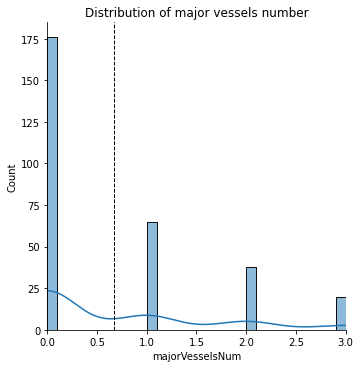

In [157]:
ax = sns.displot(data=df_cleveland, x="majorVesselsNum", kde=True, bins=30)
plt.xlim((0,df_cleveland['majorVesselsNum'].max()))
plt.axvline(df_cleveland['majorVesselsNum'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.title('Distribution of major vessels number')

This histogram does not appear as normalised, so replacing the missing value with mode value is a suitable option. Group the data in 'majorVesselsNum' by 'diagnosis' and replace the missing values with the mode value for each diagnosis category.

In [158]:
s = df_cleveland.groupby('diagnosis').apply(lambda x: round(x['majorVesselsNum'].value_counts().index[0]))
s

diagnosis
0    0
1    0
2    1
3    2
4    3
dtype: int64

Find an example NaN(s), replace all with mean value and check whether the new value is as expected based on the diagnosis category. In this case, the replacement is successful.

In [159]:
df_cleveland[['diagnosis','majorVesselsNum']].query('majorVesselsNum == "NaN"').head(5)

,diagnosis,majorVesselsNum
167,0,NaN
193,1,NaN
288,0,NaN
303,0,NaN


In [160]:
df_cleveland['majorVesselsNum'].fillna(df_cleveland['diagnosis'].map(s), inplace=True)
df_cleveland.loc[167]

age                     52.0
sex                      1.0
chestPain                3.0
restBloodPressure      138.0
cholesterol            223.0
highBloodSugar           0.0
electrocardiography      0.0
maxHeartRate           169.0
sportAngina              0.0
STdepression             0.0
STsegmentSlope           1.0
majorVesselsNum          0.0
thalStatus               3.0
diagnosis                0.0
Name: 167, dtype: float64

##### THALSTATUS: category | MODE

In [161]:
s = df_cleveland.groupby('diagnosis').apply(lambda x: round(x['thalStatus'].mode()))
s

,0
diagnosis,
0,3.0
1,7.0
2,7.0
3,7.0
4,7.0


Replace all missing values in column 'STsegmentSlope' with the corresponding value depending on the diagnosis. Find an example NaN(s), replace all with mode value and check whether the new value is as expected based on the diagnosis category. In this case, the replacement is successful.

In [162]:
df_cleveland[['diagnosis','thalStatus']].query('thalStatus == "NaN"')

,diagnosis,thalStatus
88,0,NaN
267,2,NaN


In [163]:
df_cleveland['thalStatus'] = df_cleveland['thalStatus'].fillna(df_cleveland.groupby('diagnosis')['thalStatus'].transform(lambda x: x.fillna(x.mode()[0])))
df_cleveland.loc[88]

age                     53.0
sex                      0.0
chestPain                3.0
restBloodPressure      128.0
cholesterol            216.0
highBloodSugar           0.0
electrocardiography      2.0
maxHeartRate           115.0
sportAngina              0.0
STdepression             0.0
STsegmentSlope           1.0
majorVesselsNum          0.0
thalStatus               3.0
diagnosis                0.0
Name: 88, dtype: float64

#### DATA TYPES

The initially presented data types for this dataset are as follows:

In [164]:
df_cleveland.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 1 to 303
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    float64
 1   sex                  303 non-null    float64
 2   chestPain            303 non-null    float64
 3   restBloodPressure    303 non-null    float64
 4   cholesterol          303 non-null    float64
 5   highBloodSugar       303 non-null    float64
 6   electrocardiography  303 non-null    float64
 7   maxHeartRate         303 non-null    float64
 8   sportAngina          303 non-null    float64
 9   STdepression         303 non-null    float64
 10  STsegmentSlope       303 non-null    float64
 11  majorVesselsNum      303 non-null    float64
 12  thalStatus           303 non-null    float64
 13  diagnosis            303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


Change these according to section "Data insight".

##### Integer values

In [165]:
df_cleveland = df_cleveland.astype({'age':'int32', 'restBloodPressure': 'int32', 'cholesterol': 'int32', 
                                    'maxHeartRate': 'int32', 'majorVesselsNum': 'int32'})

##### Floating numbers

In [166]:
df_cleveland = df_cleveland.astype({'STdepression':'float64'})

##### Categorical data

In [167]:
df_cleveland['sex'] = df_cleveland['sex'].astype('int32')
df_cleveland['sex'] = df_cleveland['sex'].astype('category')

In [168]:
df_cleveland['chestPain'] = df_cleveland['chestPain'].astype('int32')
df_cleveland['chestPain'] = df_cleveland['chestPain'].astype('category')

In [169]:
df_cleveland['highBloodSugar'] = df_cleveland['highBloodSugar'].astype('int32')
df_cleveland['highBloodSugar'] = df_cleveland['highBloodSugar'].astype('category')

In [170]:
df_cleveland['electrocardiography'] = df_cleveland['electrocardiography'].astype('int32')
df_cleveland['electrocardiography'] = df_cleveland['electrocardiography'].astype('category')

In [171]:
df_cleveland['sportAngina'] = df_cleveland['sportAngina'].astype('int32')
df_cleveland['sportAngina'] = df_cleveland['sportAngina'].astype('category')

In [172]:
df_cleveland['STsegmentSlope'] = df_cleveland['STsegmentSlope'].astype('int32')
df_cleveland['STsegmentSlope'] = df_cleveland['STsegmentSlope'].astype('category')

In [173]:
df_cleveland['thalStatus'] = df_cleveland['thalStatus'].astype('int32')
df_cleveland['thalStatus'] = df_cleveland['thalStatus'].astype('category')

In [174]:
df_cleveland['diagnosis'] = df_cleveland['diagnosis'].astype('int32')
df_cleveland['diagnosis'] = df_cleveland['diagnosis'].astype('category')

To make sure everything has been adjusted successfully, review the statistics and a few rows from the dataset.

In [175]:
df_cleveland.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 1 to 303
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   age                  303 non-null    int32   
 1   sex                  303 non-null    category
 2   chestPain            303 non-null    category
 3   restBloodPressure    303 non-null    int32   
 4   cholesterol          303 non-null    int32   
 5   highBloodSugar       303 non-null    category
 6   electrocardiography  303 non-null    category
 7   maxHeartRate         303 non-null    int32   
 8   sportAngina          303 non-null    category
 9   STdepression         303 non-null    float64 
 10  STsegmentSlope       303 non-null    category
 11  majorVesselsNum      303 non-null    int32   
 12  thalStatus           303 non-null    category
 13  diagnosis            303 non-null    category
dtypes: category(8), float64(1), int32(5)
memory usage: 11.8 KB


In [176]:
df_cleveland

,age,sex,chestPain,restBloodPressure,cholesterol,highBloodSugar,electrocardiography,maxHeartRate,sportAngina,STdepression,STsegmentSlope,majorVesselsNum,thalStatus,diagnosis
1,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
2,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
3,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
4,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
5,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
300,68,1,4,144,193,1,0,141,0,3.4,2,2,7,2
301,57,1,4,130,131,0,0,115,1,1.2,2,1,7,3
302,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1


The Cleveland dataset has been prepared for fruitful analysis and further manipulations.

## Type of analysis

##### Classification - classify whether a patient has a heart disease or not

## Combine datasets

All 4 datasets contain the same attributes. Data types are also unified, differences in values appear only in columns 'majorVesselsNum' & 'thalStatus' due to the many 'NaN' values in the VA & Hungary datasets. However, this is not an obstacle and combining the 4 dataframes is possible. Before combining, add one additional column to each dataset, which represents the data resources - 4 options: VA, Hungary, Switzerland, Cleveland.

#### Additional column for data source

In [177]:
df_va['dataSource'] = 'VA'
df_va

,age,sex,chestPain,restBloodPressure,cholesterol,highBloodSugar,electrocardiography,maxHeartRate,sportAngina,STdepression,STsegmentSlope,majorVesselsNum,thalStatus,diagnosis,dataSource
1,63,1,4,140,260,0,1,112,1,3.00,2,NaN,NaN,2,VA
2,44,1,4,130,209,0,1,127,0,0.00,2,NaN,NaN,0,VA
3,60,1,4,132,218,0,1,140,1,1.50,3,NaN,NaN,2,VA
4,55,1,4,142,228,0,1,149,1,2.50,1,NaN,NaN,1,VA
5,66,1,3,110,213,1,2,99,1,1.30,2,NaN,NaN,0,VA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,54,0,4,127,333,1,1,154,0,0.00,2,NaN,NaN,1,VA
197,62,1,1,130,139,0,1,125,0,0.74,2,NaN,NaN,0,VA
198,55,1,4,122,223,1,1,100,0,0.00,2,NaN,6.0,2,VA
199,58,1,4,130,385,1,2,125,0,0.74,2,NaN,NaN,0,VA


In [178]:
df_hungary['dataSource'] = 'Hungary'
df_hungary

,age,sex,chestPain,restBloodPressure,cholesterol,highBloodSugar,electrocardiography,maxHeartRate,sportAngina,STdepression,STsegmentSlope,majorVesselsNum,thalStatus,diagnosis,dataSource
1,40,1,2,140,289,0,0,172,0,0.0,2,NaN,NaN,0,Hungary
2,49,0,3,160,180,0,0,156,0,1.0,2,NaN,NaN,1,Hungary
3,37,1,2,130,283,0,1,98,0,0.0,2,NaN,NaN,0,Hungary
4,48,0,4,138,214,0,0,108,1,1.5,2,NaN,NaN,3,Hungary
5,54,1,3,150,240,0,0,122,0,0.0,2,NaN,NaN,0,Hungary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,48,0,2,131,308,0,1,145,0,2.0,1,NaN,NaN,0,Hungary
291,36,1,2,120,166,0,0,180,0,0.0,2,NaN,NaN,0,Hungary
292,48,1,3,110,211,0,0,138,0,0.0,2,NaN,6.0,0,Hungary
293,47,0,2,140,257,0,0,135,0,1.0,1,NaN,NaN,0,Hungary


In [179]:
df_switzerland['dataSource'] = 'Switzerland'
df_switzerland

,age,sex,chestPain,restBloodPressure,cholesterol,highBloodSugar,electrocardiography,maxHeartRate,sportAngina,STdepression,STsegmentSlope,majorVesselsNum,thalStatus,diagnosis,dataSource
1,32,1,1,95,0,0,0,127,0,0.70,1,NaN,7,1,Switzerland
2,34,1,4,115,0,0,0,154,0,0.20,1,NaN,7,1,Switzerland
3,35,1,4,150,0,0,0,130,1,0.95,2,NaN,7,3,Switzerland
4,36,1,4,110,0,0,0,125,1,1.00,2,NaN,6,1,Switzerland
5,38,0,4,105,0,0,0,166,0,2.80,1,NaN,7,2,Switzerland
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,70,1,4,115,0,0,1,92,1,0.00,2,NaN,7,1,Switzerland
120,70,1,4,140,0,1,0,157,1,2.00,2,NaN,7,3,Switzerland
121,72,1,3,160,0,0,2,114,0,1.60,2,2.0,7,0,Switzerland
122,73,0,3,160,0,0,1,121,0,0.00,1,NaN,3,1,Switzerland


In [180]:
df_cleveland['dataSource'] = 'Cleveland'
df_cleveland

,age,sex,chestPain,restBloodPressure,cholesterol,highBloodSugar,electrocardiography,maxHeartRate,sportAngina,STdepression,STsegmentSlope,majorVesselsNum,thalStatus,diagnosis,dataSource
1,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,Cleveland
2,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2,Cleveland
3,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,Cleveland
4,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0,Cleveland
5,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0,Cleveland
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1,Cleveland
300,68,1,4,144,193,1,0,141,0,3.4,2,2,7,2,Cleveland
301,57,1,4,130,131,0,0,115,1,1.2,2,1,7,3,Cleveland
302,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1,Cleveland


#### Combine 4 datasets

In [181]:
df_combined = pd.concat([df_va, df_hungary, df_switzerland, df_cleveland])

In [182]:
df_combined

,age,sex,chestPain,restBloodPressure,cholesterol,highBloodSugar,electrocardiography,maxHeartRate,sportAngina,STdepression,STsegmentSlope,majorVesselsNum,thalStatus,diagnosis,dataSource
1,63,1,4,140,260,0,1,112,1,3.0,2,NaN,NaN,2,VA
2,44,1,4,130,209,0,1,127,0,0.0,2,NaN,NaN,0,VA
3,60,1,4,132,218,0,1,140,1,1.5,3,NaN,NaN,2,VA
4,55,1,4,142,228,0,1,149,1,2.5,1,NaN,NaN,1,VA
5,66,1,3,110,213,1,2,99,1,1.3,2,NaN,NaN,0,VA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1,Cleveland
300,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2,Cleveland
301,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3,Cleveland
302,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1,Cleveland


In [183]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 920 entries, 1 to 303
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   age                  920 non-null    int32   
 1   sex                  920 non-null    category
 2   chestPain            920 non-null    category
 3   restBloodPressure    920 non-null    int32   
 4   cholesterol          920 non-null    int32   
 5   highBloodSugar       920 non-null    category
 6   electrocardiography  920 non-null    category
 7   maxHeartRate         920 non-null    int32   
 8   sportAngina          920 non-null    category
 9   STdepression         920 non-null    float64 
 10  STsegmentSlope       920 non-null    category
 11  majorVesselsNum      314 non-null    float64 
 12  thalStatus           488 non-null    float64 
 13  diagnosis            920 non-null    category
 14  dataSource           920 non-null    object  
dtypes: category(7), float64

Merging of the dataframes has been successful.

## Data analysis
Analyse which attributes influence diagnosis the most. Major vessels number and Thalassemia blood disorder status contain many 'NaN' values, therefore including these in a predictive model should be carefully considered. 

##### Divide patients into deceased (1) and healthy (0) in an additional column

Dividing patients into deceased and non-deceased would allow to better observe the differences in the cardiac examinations between the two groups.

In [184]:
df_combined['deceased'] = df_combined.diagnosis.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})

In [185]:
df_combined

,age,sex,chestPain,restBloodPressure,cholesterol,highBloodSugar,electrocardiography,maxHeartRate,sportAngina,STdepression,STsegmentSlope,majorVesselsNum,thalStatus,diagnosis,dataSource,deceased
1,63,1,4,140,260,0,1,112,1,3.0,2,NaN,NaN,2,VA,1
2,44,1,4,130,209,0,1,127,0,0.0,2,NaN,NaN,0,VA,0
3,60,1,4,132,218,0,1,140,1,1.5,3,NaN,NaN,2,VA,1
4,55,1,4,142,228,0,1,149,1,2.5,1,NaN,NaN,1,VA,1
5,66,1,3,110,213,1,2,99,1,1.3,2,NaN,NaN,0,VA,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1,Cleveland,1
300,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2,Cleveland,1
301,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3,Cleveland,1
302,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1,Cleveland,1


##### Make  age categories / groups in additional column 

Adding age categories is needed for a clearer overview in visualising the data.

    Get most common ages

In [186]:
from collections import Counter
Counter(df_combined['age']).most_common(30)
# df_combined['age'].value_counts()[:30]

[(54, 51),
 (58, 43),
 (55, 41),
 (56, 38),
 (57, 38),
 (52, 36),
 (59, 35),
 (62, 35),
 (51, 35),
 (53, 33),
 (60, 32),
 (61, 31),
 (48, 31),
 (63, 30),
 (50, 25),
 (46, 24),
 (41, 24),
 (43, 24),
 (64, 22),
 (49, 22),
 (65, 21),
 (44, 19),
 (47, 19),
 (42, 18),
 (45, 18),
 (38, 16),
 (67, 15),
 (39, 15),
 (66, 13),
 (69, 13)]

Most common ages vary 40-65. Observe the age patterns among the deceased and non-deceased patients.

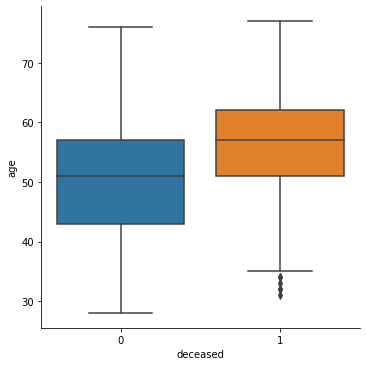

In [187]:
sns.catplot(x="deceased", y="age", kind="box", data=df_combined)

Most common ages for deceased and healthy patients slightly overlap. Non-deceased (0) ages are strongly concentrated between 45-55 and deceased (1) are a bit older - between 50-65. 

    Divide ages into groups to get a better view. Add additional column 'agerange' to the end of the combined dataset.

In [188]:
bins = [10, 20, 30, 40, 50, 60, 70, 80, 120]
labels = ['10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+']
df_combined['agerange'] = pd.cut(df_combined.age, bins, labels = labels, include_lowest = True)

In [189]:
df_combined

,age,sex,chestPain,restBloodPressure,cholesterol,highBloodSugar,electrocardiography,maxHeartRate,sportAngina,STdepression,STsegmentSlope,majorVesselsNum,thalStatus,diagnosis,dataSource,deceased,agerange
1,63,1,4,140,260,0,1,112,1,3.0,2,NaN,NaN,2,VA,1,60-69
2,44,1,4,130,209,0,1,127,0,0.0,2,NaN,NaN,0,VA,0,40-49
3,60,1,4,132,218,0,1,140,1,1.5,3,NaN,NaN,2,VA,1,50-59
4,55,1,4,142,228,0,1,149,1,2.5,1,NaN,NaN,1,VA,1,50-59
5,66,1,3,110,213,1,2,99,1,1.3,2,NaN,NaN,0,VA,0,60-69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1,Cleveland,1,40-49
300,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2,Cleveland,1,60-69
301,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3,Cleveland,1,50-59
302,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1,Cleveland,1,50-59


#### Increase the size of plots to be able to see detailed visualizations clear

In [190]:
plt.rcParams["figure.figsize"] = [25, 10]
plt.rcParams.update({'font.size': 24})

##### Age and sex visualizations

Text(0.5, 1.0, 'Variation of Age for each target class')

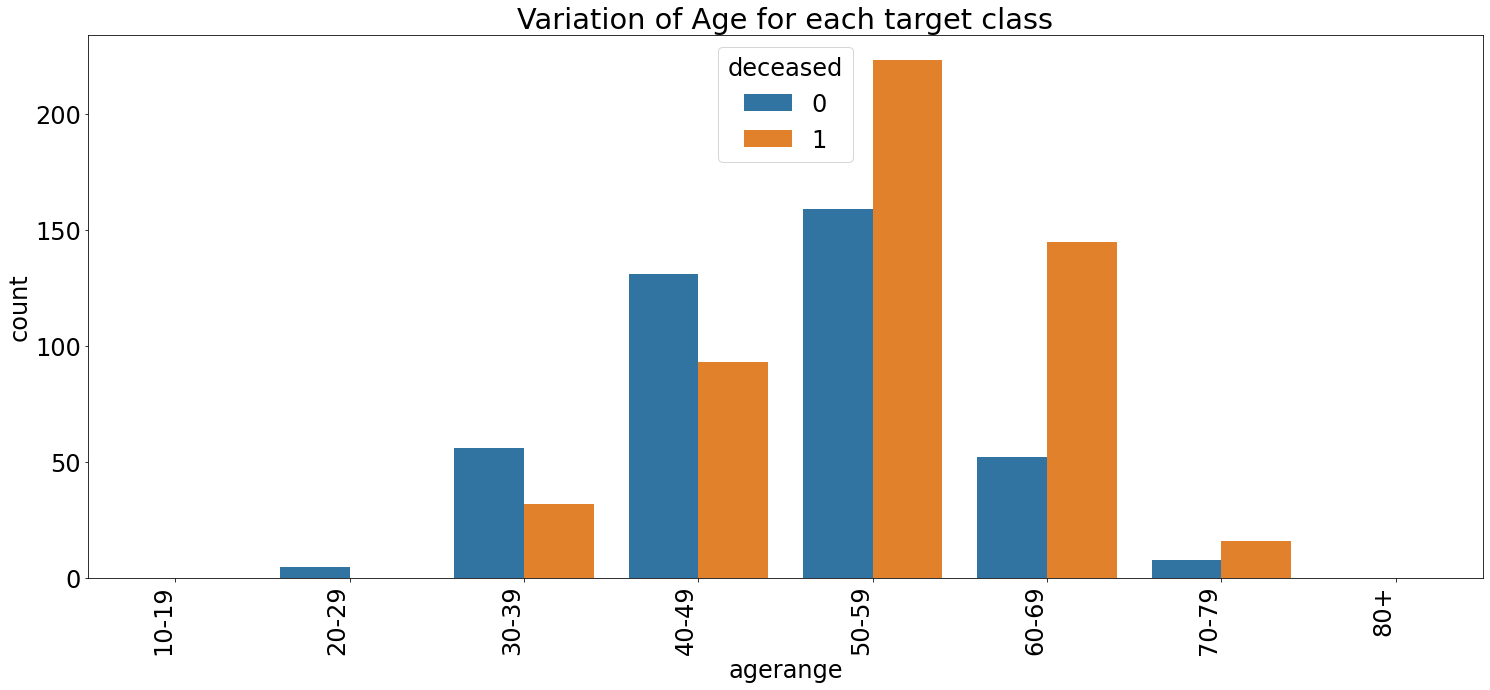

In [191]:
ax = sns.countplot(x="agerange", hue="deceased", data=df_combined)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.title('Variation of Age for each target class')

Both deceased and non-deceased patients are most commonly aged between 50-59 years old. Second by order is the agerange 60-69 for the deceased and 40-49 for the non-deceased.

Plot only the records of patients aged 40-70 to see the most common age

In [192]:
mostCommonAge = df_combined.loc[(df_combined['agerange'] == '40-49') | (df_combined['agerange'] == '50-59') | 
                                (df_combined['agerange'] == '60-69')]

Text(0.5, 1.0, 'Variation of Age for each target class')

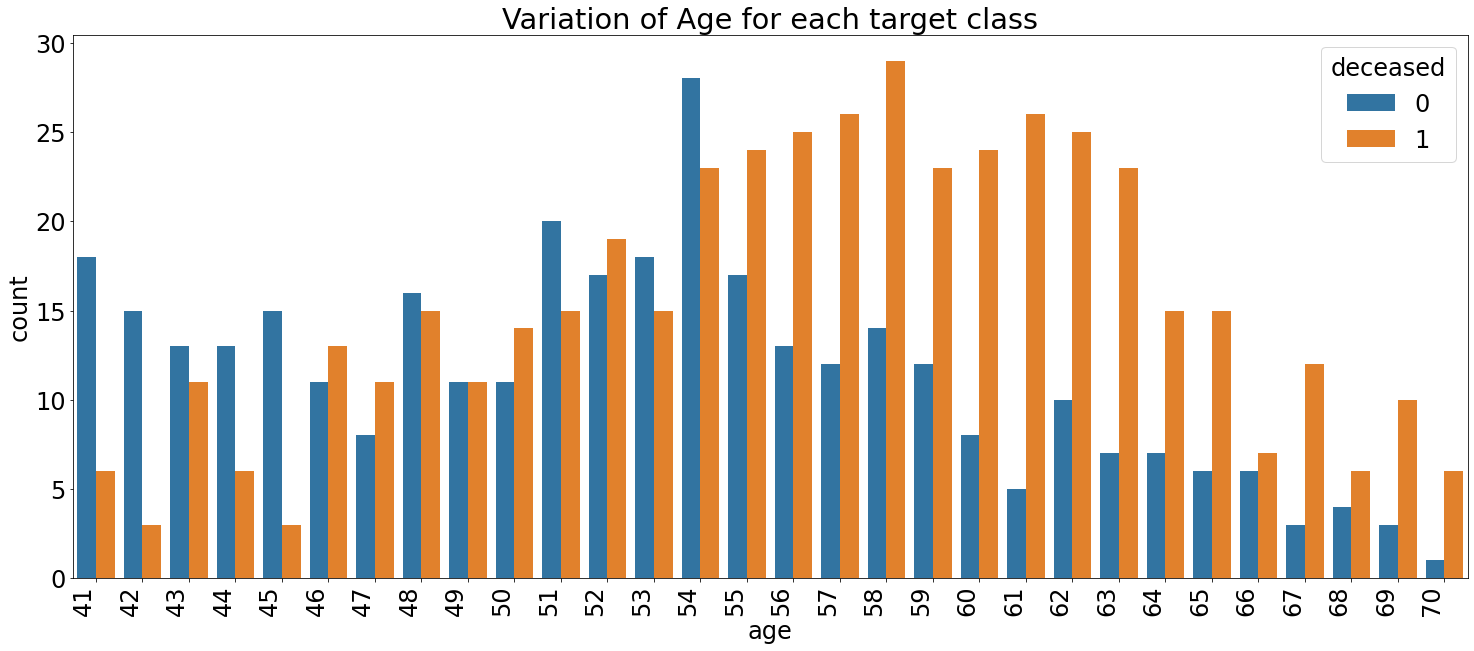

In [193]:
ax = sns.countplot(x="age", hue="deceased", data=mostCommonAge)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.title('Variation of Age for each target class')

On the one hand, people who are suffering are most commonly of the age of 58, strongly followed by 54-63. On the other hand, healthy patients are most commonly aged 54, followed by 51 and 41. Majorly, deceased patients are slightly older than the non-deceased ones. 

However, there are no patient tokens or any kind of ids in order to define whether the data is repetitive in terms of cardiac examinations of one person or not, which may give insight into a probable healing process throughout a span of time for some healthy patients. Currently, it is considered there is only one record per patient from what is provided and no observations on healing can be made. 

Next, look at the distribution of age and gender for each target class.

Text(0.5, 1.0, 'Distribution of age vs sex with the target class')

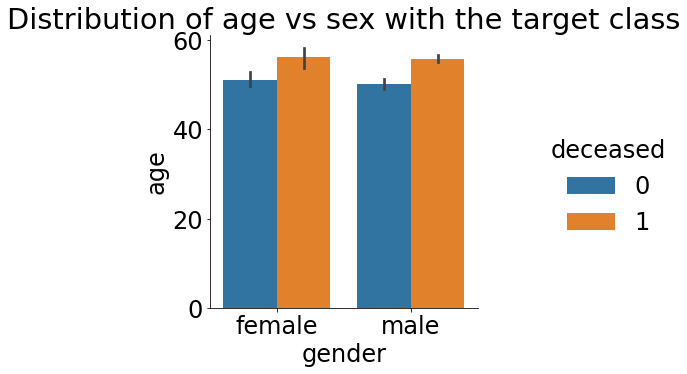

In [194]:
df_combined['gender'] = df_combined.sex.map({0:"female", 1:"male"})
sns.catplot(x="gender", y="age", hue="deceased", kind="bar", data=df_combined)
plt.title('Distribution of age vs sex with the target class')

Gender is not a factor for a cardiac disease as in this case, both males and females are distributed equally, therefore both have chance of having cardiovascular disease.

##### Cardiac examinations visualizations

> **Chest pain**

Text(0.5, 1.0, 'Variation of chest pain')

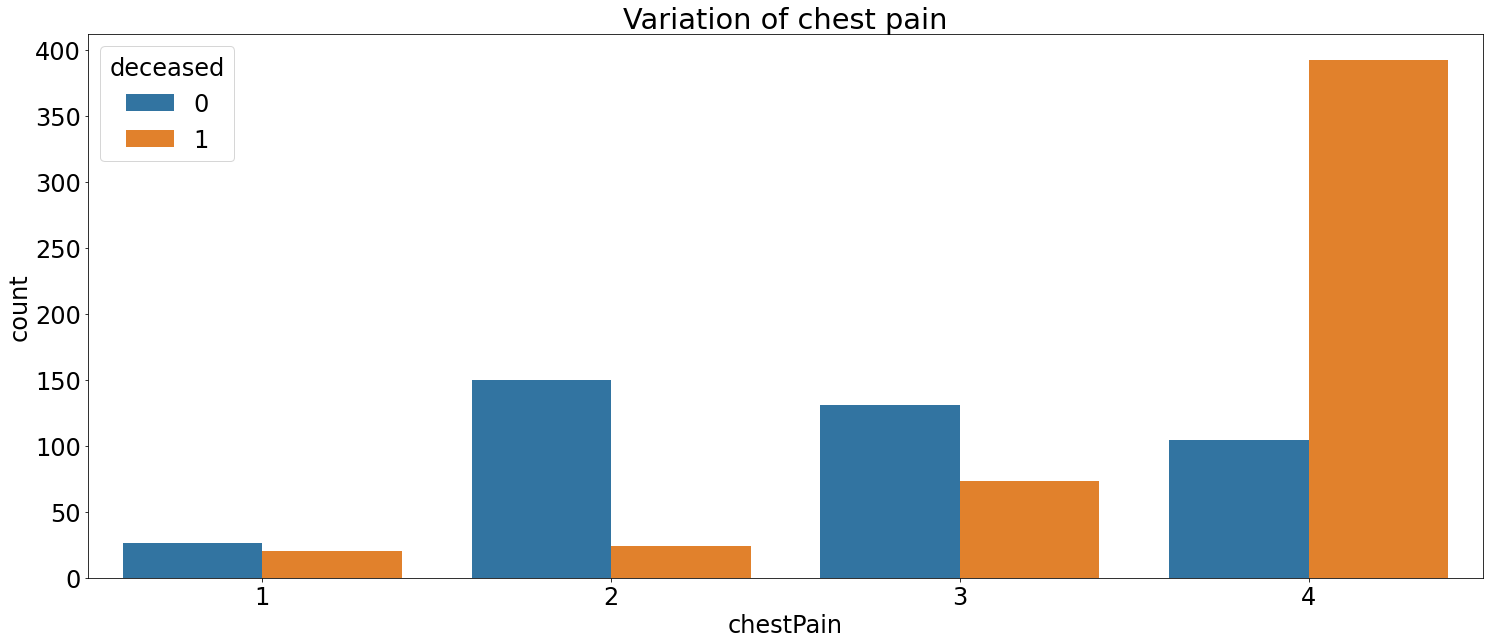

In [195]:
ax = sns.countplot(x="chestPain", hue="deceased", data=df_combined)
plt.title('Variation of chest pain')

Patients with a heart disease most commonly have a chest pain type level of 4, which is a suitable factor in further modeling. The other levels from 1-3 are not indicative as the non-diseased prevail.

> **Distribution of resting blood pressure**

Text(0.5, 1.0, 'Overall distribution of resting blood pressure')

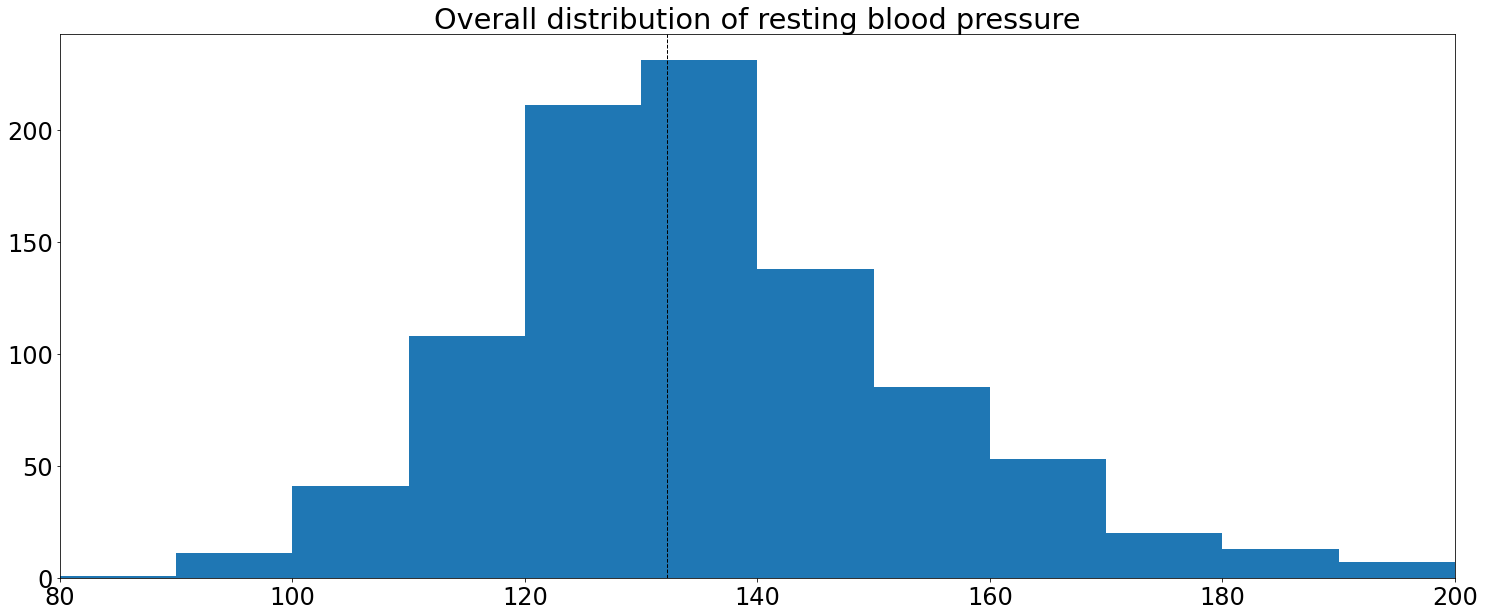

In [196]:
plt.hist(df_combined['restBloodPressure'], bins=20)
plt.axvline(df_combined['restBloodPressure'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.xlim((80,df_combined['restBloodPressure'].max()))
plt.title('Overall distribution of resting blood pressure')

The black dashed line represents the median value ~ 133.

Text(0.5, 1.0, 'Distribution of restBloodPressure vs sex with the target class')

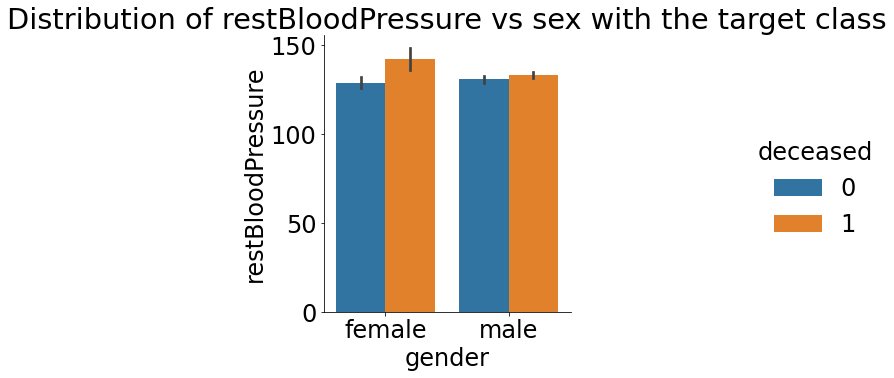

In [197]:
sns.catplot(x="gender", y="restBloodPressure", hue="deceased", kind="bar", data=df_combined)
plt.title('Distribution of restBloodPressure vs sex with the target class')

There are no big differences in the resting blood pressure between males and females. Normal blood pressure is considered to be between 80-125. Therefore, deceased patients having increased resting blood pressure is a good factor for a heart disease.

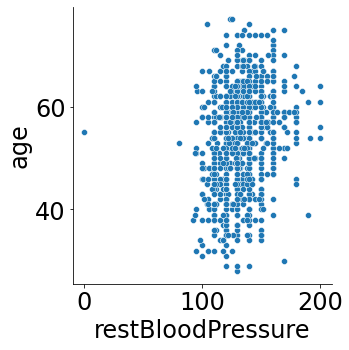

In [198]:
sns.relplot(x=df_combined['restBloodPressure'], y=df_combined['age'])

No relation between age and resting blood pressure.

> **Distribution of cholesterol levels**

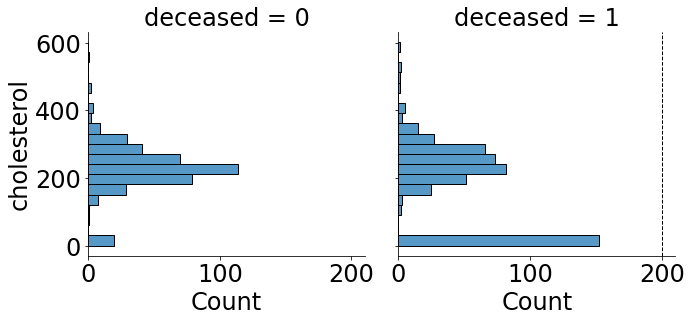

In [199]:
sns.displot(data=df_combined, y="cholesterol", col="deceased", bins=20)
plt.axvline(df_combined['cholesterol'].mean(), color='k', linestyle='dashed', linewidth=1)

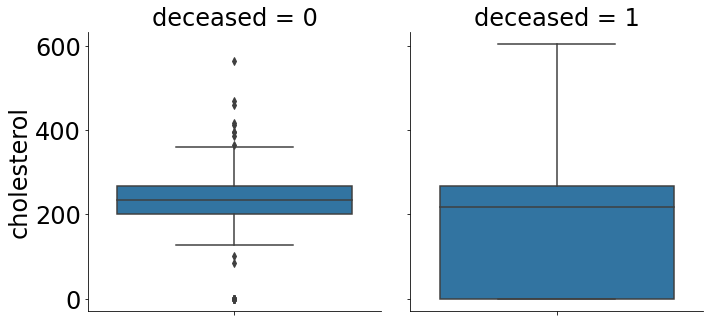

In [200]:
sns.catplot(col="deceased", y="cholesterol", kind="box", data=df_combined)

Cholestrol levels for the non-disease cohort are similar to the diseased patients. There are several individuals  possessing very high cholestrol levels (outliers for non-diseased = 0). Normal cholesterol levels are considered to be values close to 125-200 mg/dL. A reading between 200 and 239 mg/dL is considered borderline high and a reading of 240 mg/dL and above is considered high. However, both deceased and non-deceased patients tend to have cholesterol levels above what is considered normal, most of the results fall into borderline high category. The similar values for the two target groups makes this column confusing and unsuitable for models.

Text(0.5, 1.0, 'Distribution of cholesterol vs sex with the target class')

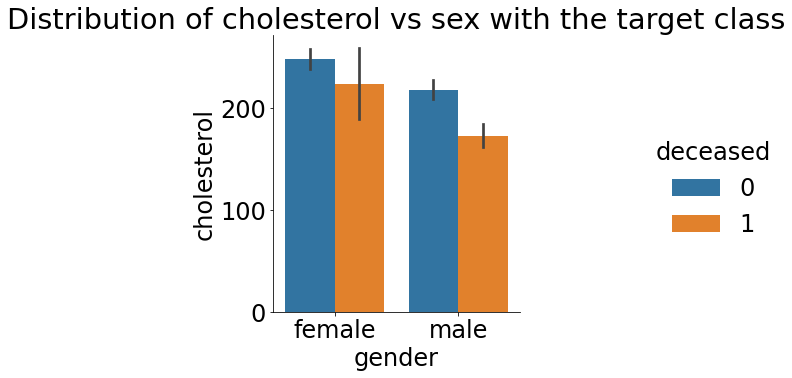

In [201]:
sns.catplot(x="gender", y="cholesterol", hue="deceased", kind="bar", data=df_combined)
plt.title('Distribution of cholesterol vs sex with the target class')

Text(0.5, 1.0, 'Cholesterol vs age relation')

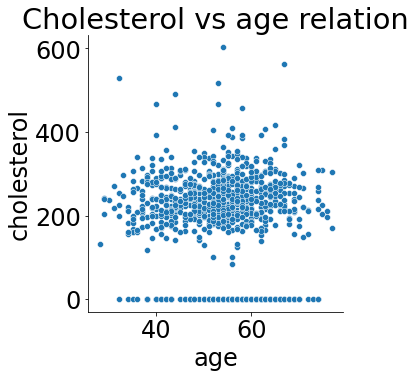

In [202]:
sns.relplot(x=df_combined['age'], y=df_combined['cholesterol'])
plt.title('Cholesterol vs age relation')

In addition, there is no fruitful relation between age and cholesterol levels or gender and cholesterol. 

> **High blood sugar**

Text(0.5, 1.0, 'Variation of high blood sugar')

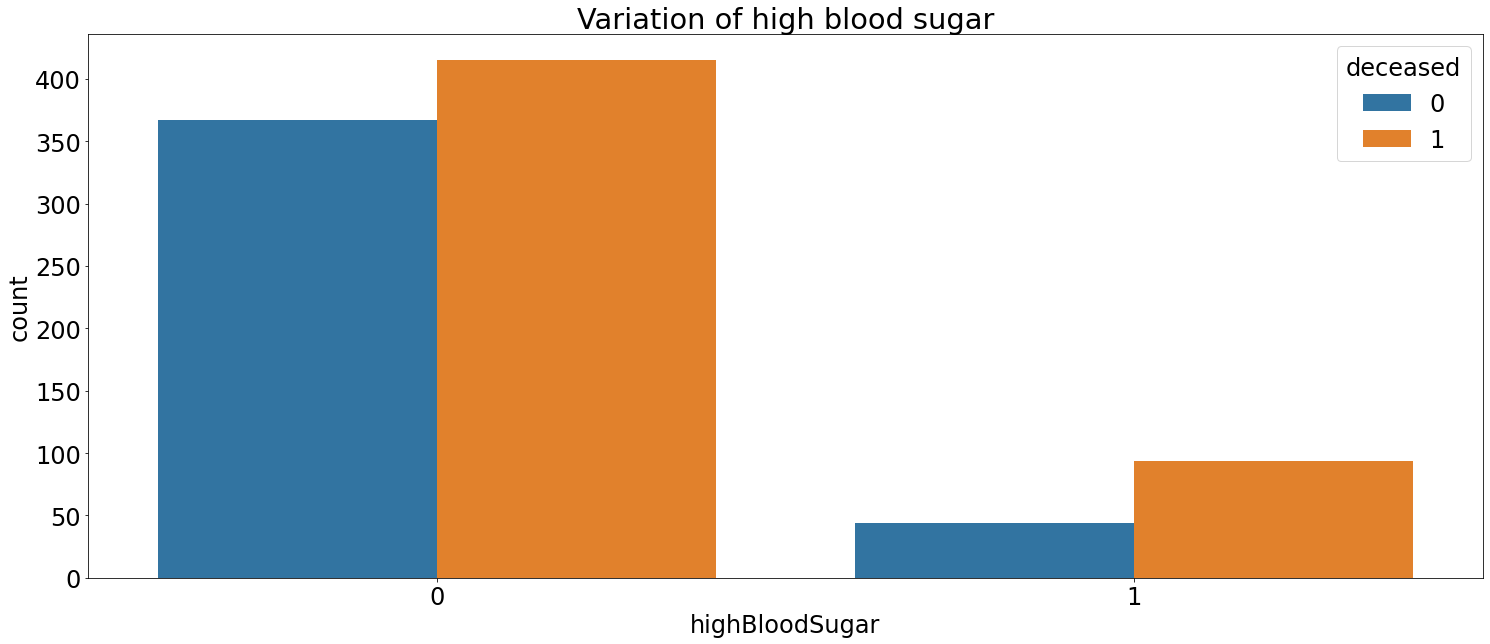

In [203]:
ax = sns.countplot(x="highBloodSugar", hue="deceased", data=df_combined)
plt.title('Variation of high blood sugar')

Most of both the diseased and healthy patients do not have high blood sugar results. This attribute would not bring much value to future modeling as examination results for both target groups overlap.

> **Electrocardiography**

Text(0.5, 1.0, 'Variation of electrocardiography')

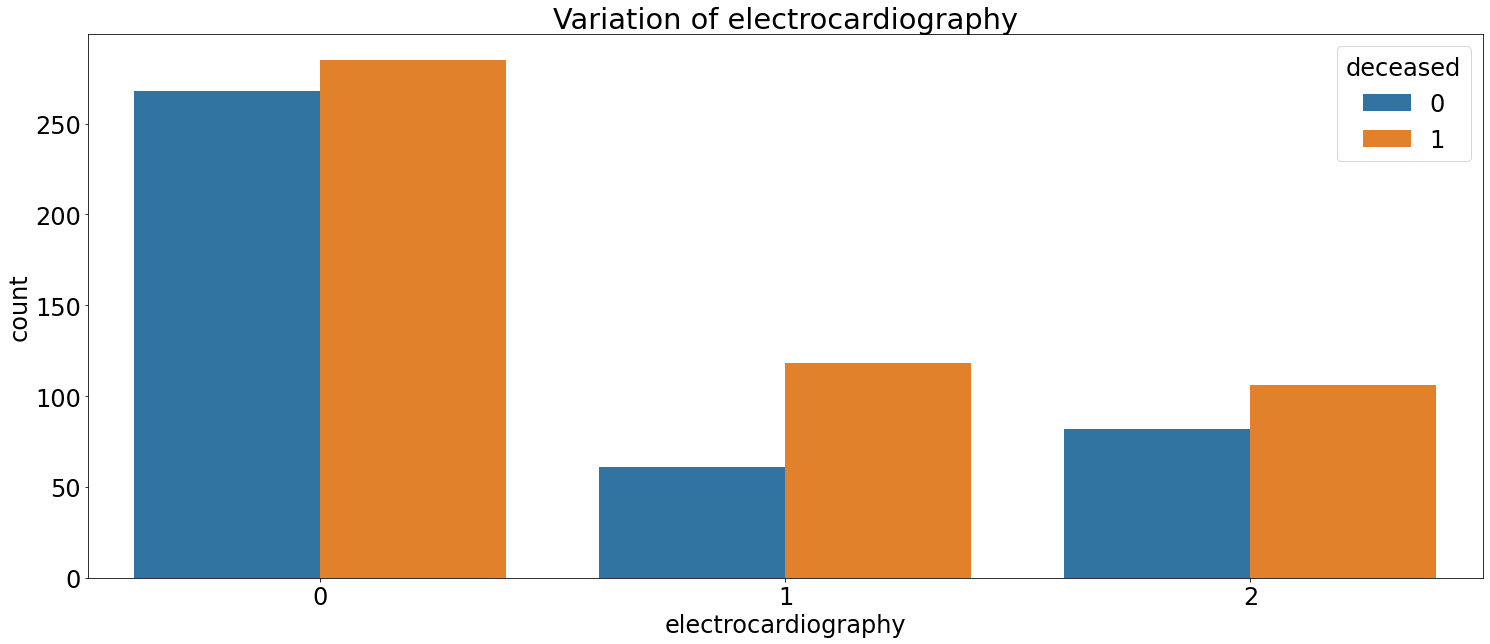

In [204]:
ax = sns.countplot(x="electrocardiography", hue="deceased", data=df_combined)
plt.title('Variation of electrocardiography')

Most of both the diseased and healthy patients have normal (0) electrocardiographical results. The other 2 types of electrocardiographical results are not indicative, too, as similar amount of both diseased and non-diseased patients have these. Therefore, this attribute would not bring much value to future modeling.

> **Distribution of max heart rate**

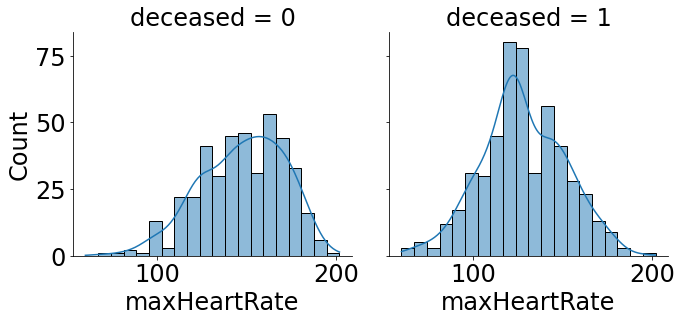

In [205]:
sns.displot(data=df_combined, x="maxHeartRate", col="deceased", kde=True, bins=20)

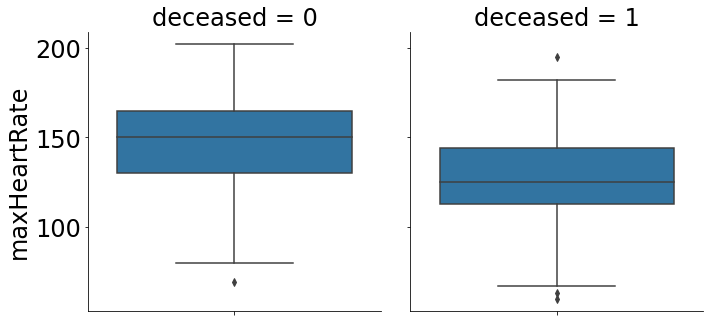

In [206]:
sns.catplot(col="deceased", y="maxHeartRate", kind="box", data=df_combined)

Patients which have a heart disease tend to have lower max heart rate compared to the non-deceased. This is a suitable factor for further prediction of the target.

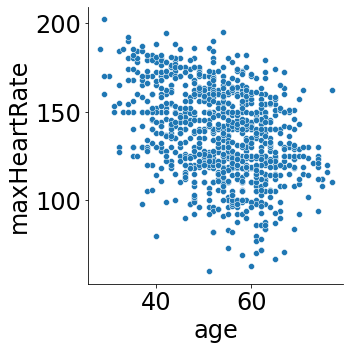

In [207]:
sns.relplot(x=df_combined['age'], y=df_combined['maxHeartRate'])

In addition, even though there seem to be many outliers, a correlation between age and max heart rate can be extracted - the older the patient is the lower the max heart rate becomes. Observe relation to gender, too.

Text(0.5, 1.0, 'Distribution of max heart rate vs sex with the target class')

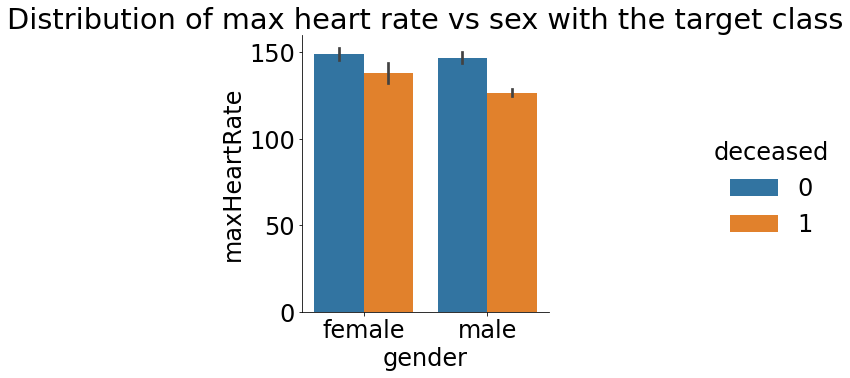

In [208]:
sns.catplot(x="gender", y="maxHeartRate", hue="deceased", kind="bar", data=df_combined)
plt.title('Distribution of max heart rate vs sex with the target class')

Overall, gender is not indicative for max heart rate as both females and males have overlapping values.

> **Sport Angina**

Text(0.5, 1.0, 'Variation of sport induced angina')

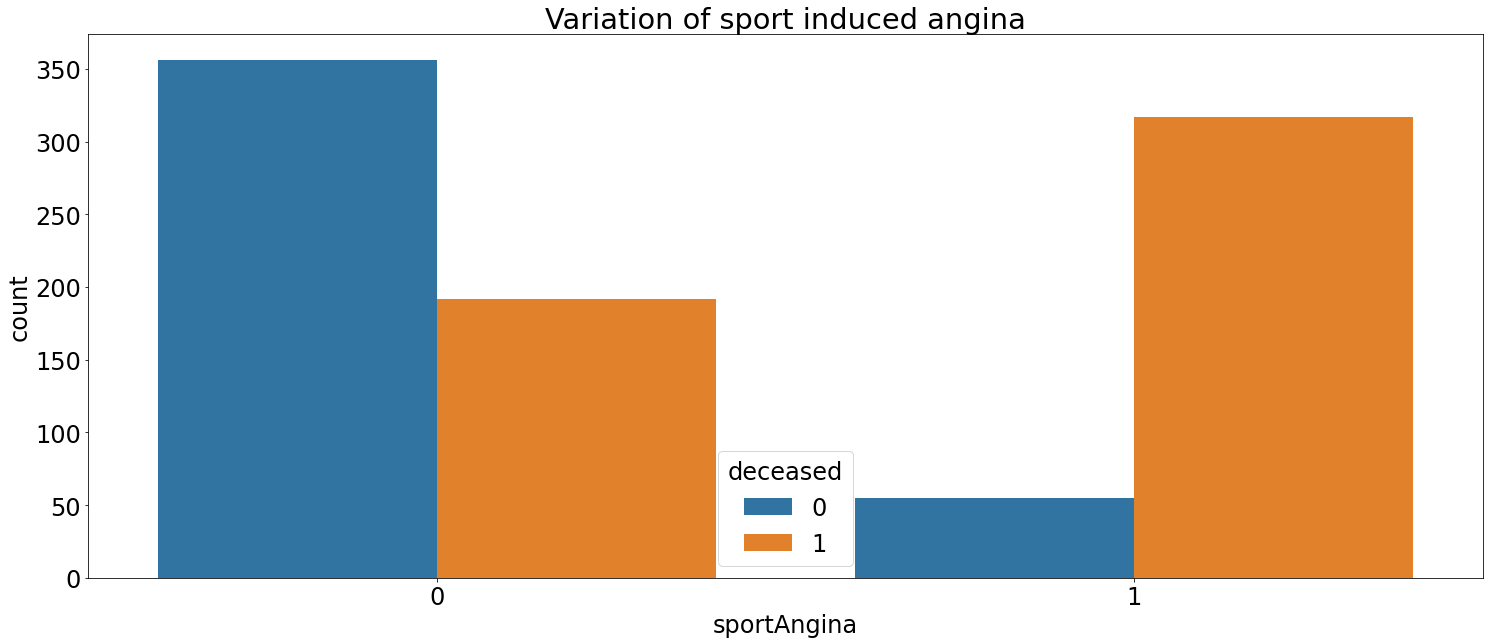

In [209]:
ax = sns.countplot(x="sportAngina", hue="deceased", data=df_combined)
plt.title('Variation of sport induced angina')

Sport angina would be a confusing factor, as a third of the deceased patients do not have sport induced angina (0 = no). Therefore, it would be better to not include it in modeling and prediction.

> **Distribution of ST depression**

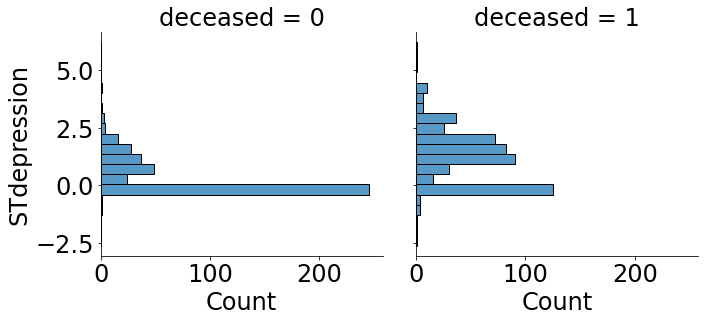

In [210]:
sns.displot(data=df_combined, y="STdepression", col="deceased", bins=20)

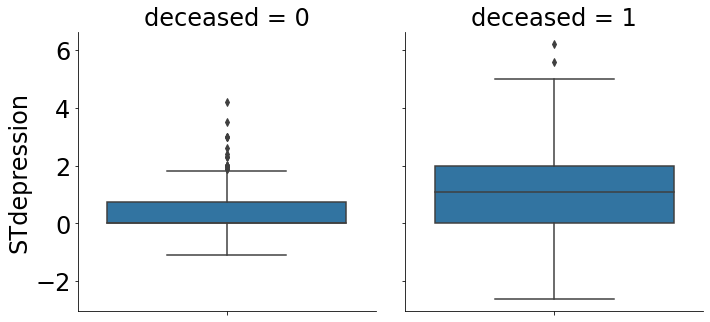

In [211]:
sns.catplot(col="deceased", y="STdepression", kind="box", data=df_combined)

Patients which have a heart disease tend to have higher ST depression results compared to the non-deceased. This is a suitable factor for further prediction of the target.

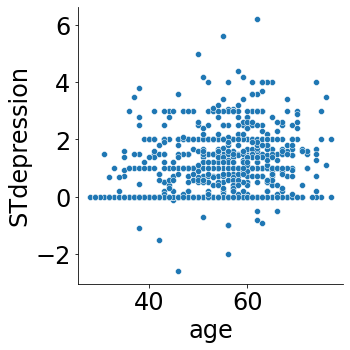

In [212]:
sns.relplot(x=df_combined['age'], y=df_combined['STdepression'])

In addition, no significant correlation between age and ST depression can be extracted. Observe relation to gender as well.

Text(0.5, 1.0, 'Distribution of ST depression vs sex with the target class')

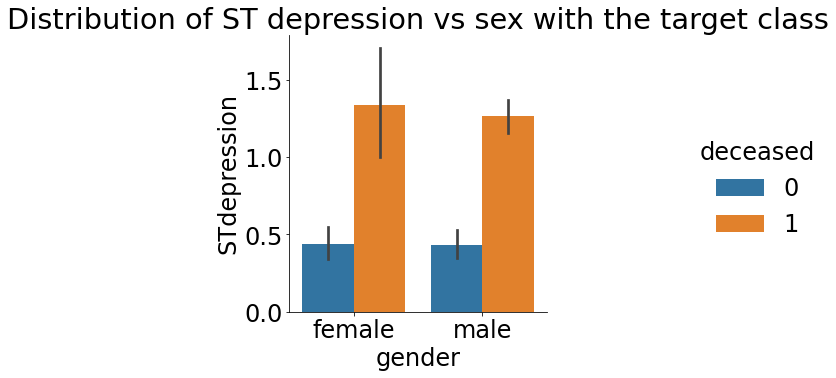

In [213]:
sns.catplot(x="gender", y="STdepression", hue="deceased", kind="bar", data=df_combined)
plt.title('Distribution of ST depression vs sex with the target class')

Females tend to have slightly higher ST depression regardless of whether they have a heart disease or not. However, gender is not indicative for ST depression as both have more or less overlapping values.

> ST segment slope

Text(0.5, 1.0, 'Variation of ST segment slope')

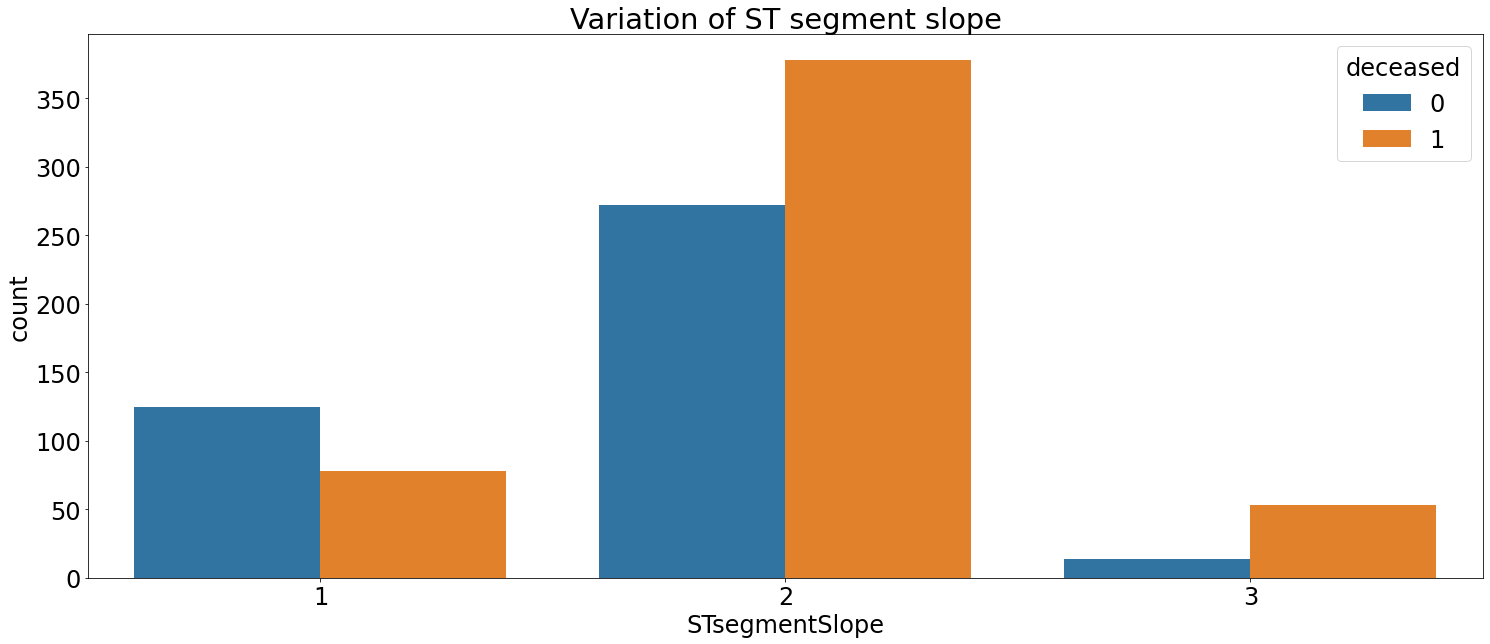

In [214]:
ax = sns.countplot(x="STsegmentSlope", hue="deceased", data=df_combined)
plt.title('Variation of ST segment slope')

The majority of patients with a heart disease tend to have ST segment slope of type 2, but so applies to the healthy group of patients, which makes this attribute unsuitable to be included in modeling.

> Distribution of major vessels number

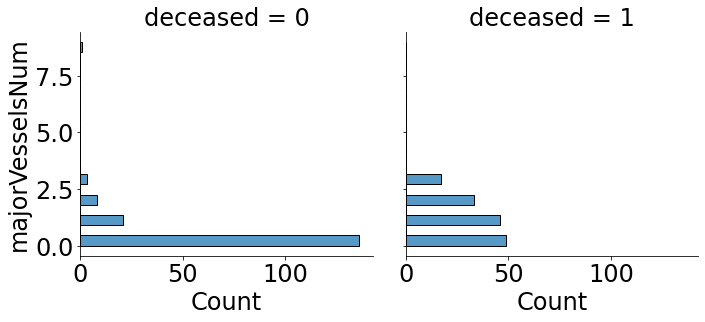

In [215]:
sns.displot(data=df_combined, y="majorVesselsNum", col="deceased", bins=20)

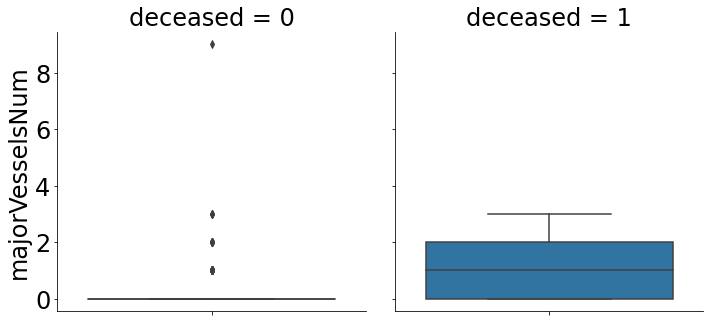

In [216]:
sns.catplot(col="deceased", y="majorVesselsNum", kind="box", data=df_combined)

Most non-deceased patients have 0 as value in column 'majorVesselsNum'. Other values are similar for both deceased and non-deceased patients and this column is not indicative for a heart disease.

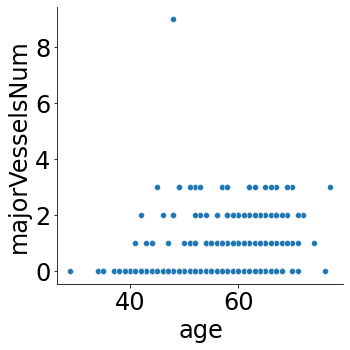

In [217]:
sns.relplot(x=df_combined['age'], y=df_combined['majorVesselsNum'])

In addition, no correlation between age and major vessels can be extracted. Observe relation to gender as well.

Text(0.5, 1.0, 'Distribution of major vessels vs sex with the target class')

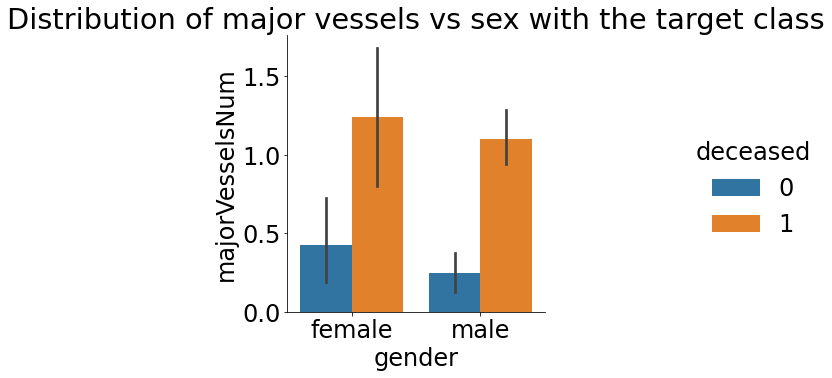

In [218]:
sns.catplot(x="gender", y="majorVesselsNum", hue="deceased", kind="bar", data=df_combined)
plt.title('Distribution of major vessels vs sex with the target class')

Overall, gender does not indicate any fruitful relation to the major vessels number.

> Thalassemia blood disorder status

Text(0.5, 1.0, 'Variation of Thalassemia status')

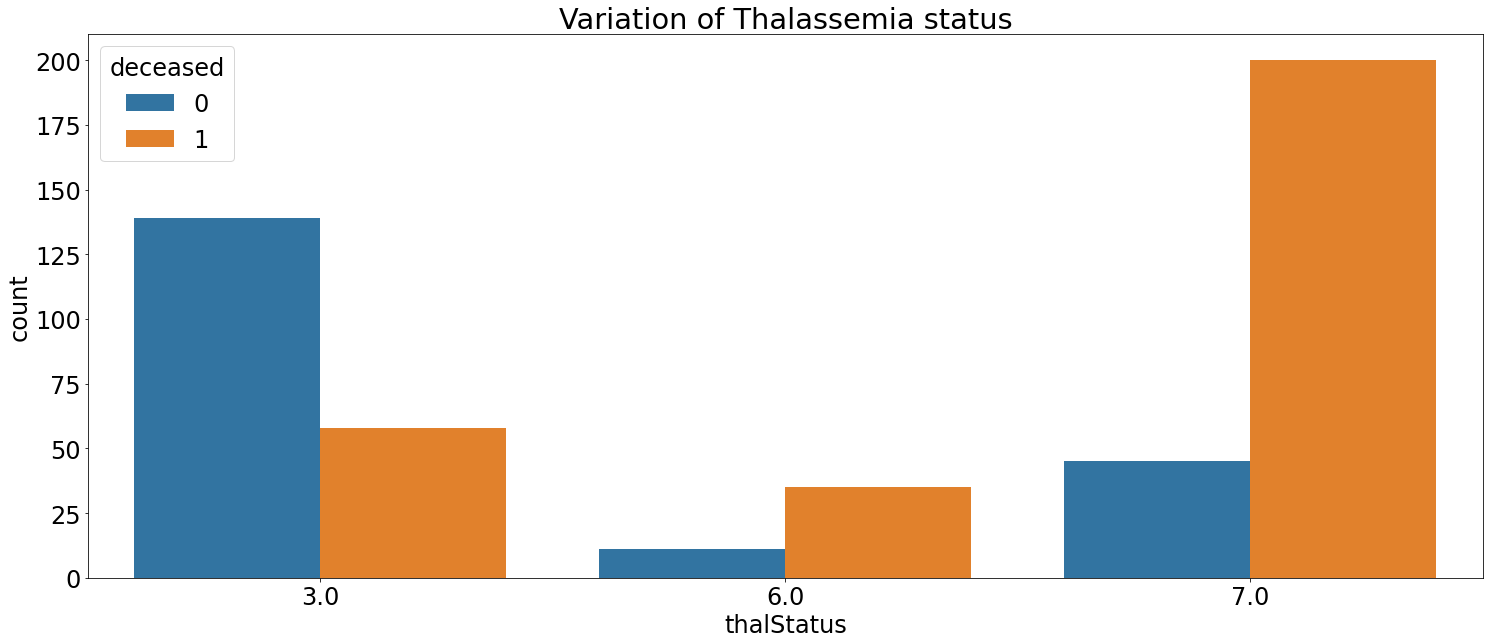

In [219]:
ax = sns.countplot(x="thalStatus", hue="deceased", data=df_combined)
plt.title('Variation of Thalassemia status')

The majority of patients with a heart disease tend to have a thal status of 7, while the majority of the healthy group of patients tends to have thal ststus of 3, which is considered as normal. Even though there are deceased patients with normal Thalassemia blood disorder, it can be assumpted that these are at an earlier stage of a heart disease. Observe this closer: 

Text(0.5, 1.0, 'Variation of Thalassemia status')

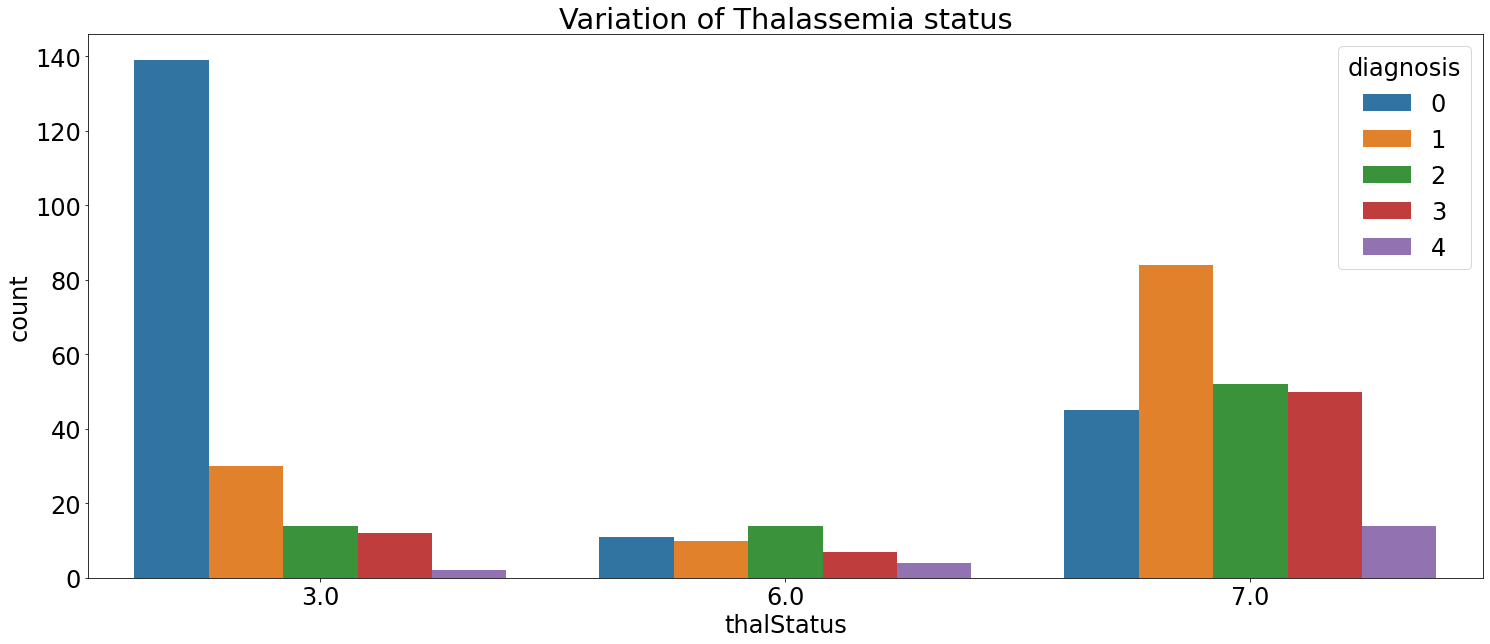

In [220]:
ax = sns.countplot(x="thalStatus", hue="diagnosis", data=df_combined)
plt.title('Variation of Thalassemia status')

The diagram shows that the assumption is partly relevant as most of the deceased patients with thal status 3 are not severly ill (blue), yet the fact that there are more deceased patients with normal Thalassemia status than 6 is confusing. In addition, a decent amount of patients with no heart disease have Thalassemia status of 7. Evidently, the thal status attribute might cause uncertainty in a predictive model, therefore it is better to not be included.

#### Correlation between numeric data
Correlation is a value between -1 and 1.
-1 for a strong negative relation, 0 for no relation at all and 1 for a strong positive relation.
A heatmap is used to visualize the correlation.

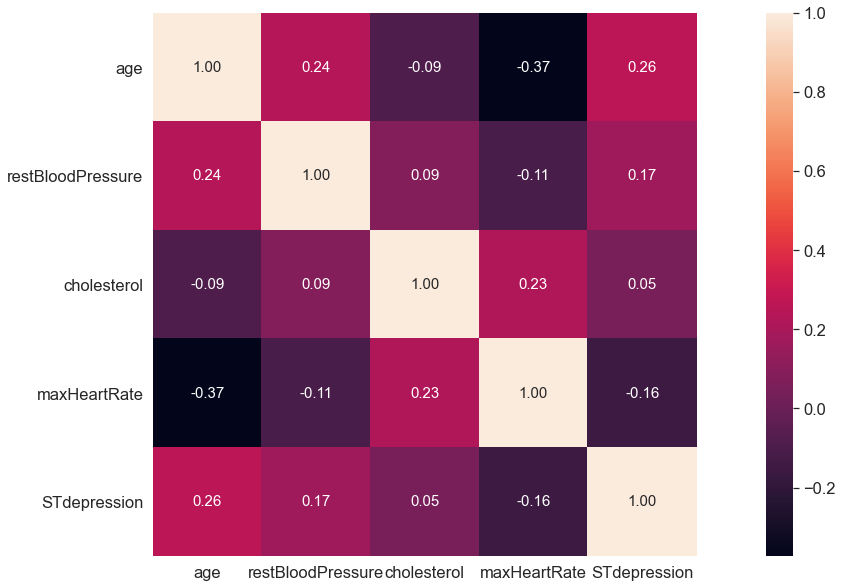

In [221]:
cols = ['age', 'restBloodPressure', 'cholesterol', 'maxHeartRate', 'STdepression']
cm = np.corrcoef(df_combined[cols].values, rowvar=0)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
    cbar=True,
    annot=True,
    square=True,
    fmt='.2f',
    annot_kws={'size': 15},
    yticklabels=cols,
    xticklabels=cols)
plt.show()

There is no obvious correlation between any of the numeric data as most results are close to 0.

## Modeling & Evaluation
This is an iterative process. First, several classification algorithms will be trained to classify presence or absence of heart disease for a patient, then an attempt to predict the degree of heart disease (values 0 to 4) will be made using the algorithms with highest scores.

Load a few libraries needed for modelling:

In [222]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler as ss

from sklearn import metrics
from sklearn.metrics import confusion_matrix

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.svm import SVC

from sklearn.naive_bayes import GaussianNB

from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier

### Data Preprocessing

Based on the analysis in the previous section, the columns to be included in the predictive modeling are the following:
* age
* chestPain
* restBloodPressure
* maxHeartRate
* STdepression

Focus first on _**predicting if a patient has a heart disease or not**_ (either 1 or 0) by using several classification algorithms.

In [223]:
combined_X = df_combined[['age', 'chestPain','restBloodPressure', 'maxHeartRate', 'STdepression']]
combined_y = df_combined['deceased']

In [224]:
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(combined_X, combined_y, test_size=0.2)

Standardizing features is a requirement for optimal performance of algorithms.

In [225]:
sc = ss()
X_train_combined = sc.fit_transform(X_train_combined)
X_test_combined = sc.transform(X_test_combined)

### Decision Tree

In [226]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train_combined, y_train_combined)

DecisionTreeClassifier()

#### Evaluation

In [227]:
y_pred = tree_clf.predict(X_test_combined)
test_score = confusion_matrix(y_pred, y_test_combined)

y_pred_train = tree_clf.predict(X_train_combined)
train_score = confusion_matrix(y_pred_train, y_train_combined)

print()
print('Accuracy for training set for Decision Tree = {}'.format((train_score[0][0] + train_score[1][1])/len(y_train_combined)))
print('Accuracy for test set for Decision Tree = {}'.format((test_score[0][0] + test_score[1][1])/len(y_test_combined)))


Accuracy for training set for Decision Tree = 1.0
Accuracy for test set for Decision Tree = 0.75


### SVM

In [228]:
classifier = SVC(kernel = 'rbf')
classifier.fit(X_train_combined, y_train_combined)

# Predicting the Test set results
y_pred = classifier.predict(X_test_combined)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test_combined)

y_pred_train = classifier.predict(X_train_combined)
cm_train = confusion_matrix(y_pred_train, y_train_combined)

print()
print('Accuracy for training set for svm = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train_combined)))
print('Accuracy for test set for svm = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test_combined)))


Accuracy for training set for svm = 0.8165760869565217
Accuracy for test set for svm = 0.8043478260869565


### Naive Bayes

In [229]:
classifier = GaussianNB()
classifier.fit(X_train_combined, y_train_combined)

# Predicting the Test set results
y_pred = classifier.predict(X_test_combined)

cm_test = confusion_matrix(y_pred, y_test_combined)

y_pred_train = classifier.predict(X_train_combined)
cm_train = confusion_matrix(y_pred_train, y_train_combined)

print()
print('Accuracy for training set for Naive Bayes = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train_combined)))
print('Accuracy for test set for Naive Bayes = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test_combined)))


Accuracy for training set for Naive Bayes = 0.7758152173913043
Accuracy for test set for Naive Bayes = 0.7880434782608695


### Logistic Regression

In [230]:
classifier = LogisticRegression()
classifier.fit(X_train_combined, y_train_combined)

# Predicting the Test set results
y_pred = classifier.predict(X_test_combined)

cm_test = confusion_matrix(y_pred, y_test_combined)

y_pred_train = classifier.predict(X_train_combined)
cm_train = confusion_matrix(y_pred_train, y_train_combined)

print()
print('Accuracy for training set for Logistic Regression = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train_combined)))
print('Accuracy for test set for Logistic Regression = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test_combined)))


Accuracy for training set for Logistic Regression = 0.7744565217391305
Accuracy for test set for Logistic Regression = 0.7880434782608695


### Random Forest

In [231]:
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(combined_X, combined_y, test_size = 0.2, random_state = 0)

classifier = RandomForestClassifier(n_estimators = 10)
classifier.fit(X_train_rf, y_train_rf)

# Predicting the Test set results
y_pred = classifier.predict(X_test_rf)

cm_test = confusion_matrix(y_pred, y_test_rf)

y_pred_train = classifier.predict(X_train_rf)
cm_train = confusion_matrix(y_pred_train, y_train_rf)

print()
print('Accuracy for training set for Random Forest = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train_rf)))
print('Accuracy for test set for Random Forest = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test_rf)))


Accuracy for training set for Random Forest = 0.9769021739130435
Accuracy for test set for Random Forest = 0.7445652173913043


### Evaluate
The highest score is 100% accuracy on the training set and 75% accuracy on the test set for Decision Tree, followed by 98% accuracy on the training set and 75% accuracy on the test set for Random Forest. In addition, the SVM algorithm has also high scores on both subsets: 82% accuracy on the training set and 80% accuracy on the test set. All these scores are positively high and can be of great use for predicting presence of heart disease for a patient. 

Train the three most successful algorithms to predict the degree of a heart disease (0-4). Repeat the same process:

### Data Preprocessing

Based on the analysis in the previous section, the columns to be included in the predictive modeling are the following:
* age
* chestPain
* restBloodPressure
* maxHeartRate
* STdepression

Now focus on _**predicting the degree of a heart disease**_ (0-4) by using algorithms with highest score from the previous iteration.

In [232]:
combined_X = df_combined[['age', 'chestPain','restBloodPressure', 'maxHeartRate', 'STdepression']]
combined_y = df_combined['diagnosis']

In [233]:
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(combined_X, combined_y, test_size=0.2, 
                                                                                        random_state = 0)

Standardizing features is a requirement for optimal performance of algorithms.

In [234]:
from sklearn.preprocessing import StandardScaler as ss
sc = ss()
X_train_combined = sc.fit_transform(X_train_combined)
X_test_combined = sc.transform(X_test_combined)

### Decision Tree

In [235]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train_combined, y_train_combined)

DecisionTreeClassifier()

#### Evaluation

In [236]:
y_pred = tree_clf.predict(X_test_combined)
test_score = confusion_matrix(y_pred, y_test_combined)

y_pred_train = tree_clf.predict(X_train_combined)
train_score = confusion_matrix(y_pred_train, y_train_combined)

print()
print('Accuracy for training set for Decision Tree = {}'.format((train_score[0][0] + train_score[1][1])/len(y_train_combined)))
print('Accuracy for test set for Decision Tree = {}'.format((test_score[0][0] + test_score[1][1])/len(y_test_combined)))


Accuracy for training set for Decision Tree = 0.6535326086956522
Accuracy for test set for Decision Tree = 0.44021739130434784


### SVM

In [237]:
#X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(combined_X, combined_y, test_size=0.2, 
                                                                                        #random_state = 0)

classifier = SVC(kernel = 'rbf')
classifier.fit(X_train_combined, y_train_combined)

# Predicting the Test set results
y_pred = classifier.predict(X_test_combined)

cm_test = confusion_matrix(y_pred, y_test_combined)

y_pred_train = classifier.predict(X_train_combined)
cm_train = confusion_matrix(y_pred_train, y_train_combined)

print()
print('Accuracy for training set for svm = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train_combined)))
print('Accuracy for test set for svm = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test_combined)))


Accuracy for training set for svm = 0.49184782608695654
Accuracy for test set for svm = 0.43478260869565216


### Random Forest

In [238]:
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(combined_X, combined_y, test_size = 0.2, random_state = 0)

classifier = RandomForestClassifier(n_estimators = 10)
classifier.fit(X_train_rf, y_train_rf)

# Predicting the Test set results
y_pred = classifier.predict(X_test_rf)

cm_test = confusion_matrix(y_pred, y_test_rf)

y_pred_train = classifier.predict(X_train_rf)
cm_train = confusion_matrix(y_pred_train, y_train_rf)

print()
print('Accuracy for training set for Random Forest = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train_rf)))
print('Accuracy for test set for Random Forest = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test_rf)))


Accuracy for training set for Random Forest = 0.6440217391304348
Accuracy for test set for Random Forest = 0.42934782608695654


### Evaluate
The highest score is 65% accuracy on the training set and 44% accuracy on the test set for Decision Tree, followed by 64% accuracy on the training set and 43% accuracy on the test set for Random Forest. The SVM algorithm did not provide high results of accuracy.

Repeat the process one more time by training the most successful algorithms - Decision Tree and Random Forest with all attributes from the dataset to see whether more accuracy may be achieved. 

### Data Preprocessing

Include all columns without NaN values in the predictive modeling.

Now focus on _**predicting the degree of a heart disease**_ (0-4) by using algorithms with highest score from the previous iteration.

In [239]:
combined_X = df_combined[['age', 'sex', 'chestPain', 'restBloodPressure', 'cholesterol', 'highBloodSugar', 
                          'electrocardiography', 'maxHeartRate', 'sportAngina', 'STdepression', 'STsegmentSlope']]
combined_y = df_combined['diagnosis']

In [240]:
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(combined_X, combined_y, test_size=0.2, 
                                                                                        random_state = 0)

Standardizing features is a requirement for optimal performance of algorithms.

In [241]:
sc = ss()
X_train_combined = sc.fit_transform(X_train_combined)
X_test_combined = sc.transform(X_test_combined)

### Decision Tree

In [242]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train_combined, y_train_combined)

DecisionTreeClassifier()

#### Evaluation

In [243]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

y_pred = tree_clf.predict(X_test_combined)
test_score = confusion_matrix(y_pred, y_test_combined)

y_pred_train = tree_clf.predict(X_train_combined)
train_score = confusion_matrix(y_pred_train, y_train_combined)

print()
print('Accuracy for training set for Decision Tree = {}'.format((train_score[0][0] + train_score[1][1])/len(y_train_combined)))
print('Accuracy for test set for Decision Tree = {}'.format((test_score[0][0] + test_score[1][1])/len(y_test_combined)))


Accuracy for training set for Decision Tree = 0.6535326086956522
Accuracy for test set for Decision Tree = 0.4076086956521739


### Random Forest

In [244]:
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(combined_X, combined_y, test_size = 0.2, random_state = 0)

classifier = RandomForestClassifier(n_estimators = 10)
classifier.fit(X_train_rf, y_train_rf)

# Predicting the Test set results
y_pred = classifier.predict(X_test_rf)

cm_test = confusion_matrix(y_pred, y_test_rf)

y_pred_train = classifier.predict(X_train_rf)
cm_train = confusion_matrix(y_pred_train, y_train_rf)

print()
print('Accuracy for training set for Random Forest = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train_rf)))
print('Accuracy for test set for Random Forest = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test_rf)))


Accuracy for training set for Random Forest = 0.6508152173913043
Accuracy for test set for Random Forest = 0.483695652173913


### Evaluate
Results overlap with the ones from previous evaluation more or less - 65% and 43% for Decision Tree and 65% and 48% for Random Forest. Therefore, a proper deduction has been achieved on which attributes are most indicative to predict the target.

# Conclusion
Predicting level of heart disease is more difficult and lower in accuracy compared to predicting presence or absence. The latter is successfully estimated with high scores of accuracy close to a 100%. To complete a high score for the former as well, more data should be gathered. A possible direction for enrichment may be personalising information for patient by adding more records of examinations for one individual throughout the time. In this way, a more in-depth observation can be achieved in terms of the process of worsening or healing a heart disease and the most important factors responsible for it.